# Úkol č. 2 - Využití neuronových sítí

  * **Deadline je 13. 5. 2024, 23:59:59**, pokud odevzdáte úkol do 20. 5. 2024, 23:59:59, budete penalizování -12 body, pozdější odevzdání je bez bodu.
  * V rámci tohoto úkolu musíte sestrojit vhodný model neuronové sítě pro vícetřídou klasifikaci.
  * Část bodů získáte za správné vypracování a část bodů získáte za výslednou přesnost Vašeho modelu na evaluačních datech.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budou strhávány body.

## Zdroj dat

 * Zdrojem dat jsou soubory `train.csv` a `evaluate.csv`.
 * Jedná se o obrázky 32x32 pixelů ve stupních šedi, které byly nějakým způsobem vyrobeny z [Fashion Mnist datasetu](https://www.kaggle.com/datasets/zalando-research/fashionmnist).
 * Soubor `train.csv` obsahuje trénovací data.
 * Cílová (vysvětlovaná) proměnná se jmenuje **label**.
 * Soubor `evaluate.csv` obsahuje testovací data bez hodnot skutečných labelů.

## Pokyny k vypracování (max 18 bodů)

**Body zadání**, za jejichž (poctivé) vypracování získáte **18 bodů**:
  * V notebooku načtěte data ze souboru `train.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování, porovnávání modelů a následnou predikci výkonnosti finálního modelu.
  * Proveďte základní průzkum dat a svá pozorování diskutujte. Některé obrázky také zobrazte.
  * Sestrojte a natrénujte několik variant modelu dopředné neuronové sítě. Přitom v rámci výpočetních možností:
      * Okomentujte vhodnost daného modelu pro daný typ úlohy.
      * Experimentujte s různými hloubkami a velikosmi vrstev.
      * Experimentujte se standardizací/normalizací dat.
      * Experimentujte s různými optimalizačními metodami.
      * Experimentujte s různými regularizačními technikami.
      * Získané výsledky vždy řádně okomentujte.

  * Sestrojte model konvoluční neuronové sítě. Přitom v rámci výpočetních možností:
      * Okomentujte vhodnost daného modelu pro daný typ úlohy.
      * Experimentujte s různými hloubkami a velikosmi vrstev.
      * Experimentujte se standardizací/normalizací dat.
      * Experimentujte s různými optimalizačními metodami.
      * Experimentujte s různými regularizačními technikami.
      * Získané výsledky vždy řádně okomentujte.
    
  * Ze všech zkoušených možností vyberte finální model a odhadněte, jakou přesnost můžete očekávat na nových datech, která jste doposud neměli k dispozici.
  
  * Nakonec načtěte vyhodnocovací data ze souboru`evaluate.csv`. Pomocí finálního modelu napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte do sloupce **label** a identifikátory do sloupce **ID**. Tento soubor též odevzdejte (uložte do projektu vedle notebooku).
   
   * Ukázka prvních řádků souboru `results.csv`:
  
```
ID,label
0,0
1,1
...
```

## Vyhodnocovací část (max 7 bodů)
Za přesnost (accuraccy) na odevzdaných predikcích pro vyhodnocovací množnu získáte dalších max **7 bodů**.

Označíme-li $A$ přesnost, které jste dosáhli, zaokrouhlenou na 2 desetinná místa, akumulují se výsledné body podle následujících pravidel:
* pokud $A \geq 0.80$ obdržíte +1 bod
* pokud $A \geq 0.83$ obdržíte +1 bod
* pokud $A \geq 0.86$ obdržíte +1 bod
* pokud $A \geq 0.87$ obdržíte +1 bod
* pokud $A \geq 0.88$ obdržíte +1 bod
* pokud $A \geq 0.89$ obdržíte +1 bod
* pokud $A \geq 0.90$ obdržíte +1 bod

**Příklad:** Pokud bude Vaše přesnost 0.856, vyjde A = 0.86 a vy získáte 3 body.


## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML2/homeworks/index.html.
  * Vytvořte i csv soubor `results.csv` s predikcemi a uložte ho v rámci projektu vedle ipython notebooku.

In [1]:
### odtud už je to Vaše



# ŘEŠENÍ

## I. Předzpracování dat

Importuju potřebné knihovny

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

Načítam si dataset ze csv-souboru a podívám se na informace o něm

In [3]:
df = pd.read_csv('train.csv')
display(df.shape)
display(df.head())
display(df.info())
display(df.nunique())
display(df.describe())

(52500, 1025)

,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,pix10,...,pix1016,pix1017,pix1018,pix1019,pix1020,pix1021,pix1022,pix1023,pix1024,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,3
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,7
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52500 entries, 0 to 52499
Columns: 1025 entries, pix1 to label
dtypes: int64(1025)
memory usage: 410.6 MB


None

pix1       12
pix2       12
pix3       12
pix4       12
pix5       12
           ..
pix1021    12
pix1022    12
pix1023    12
pix1024    12
label      10
Length: 1025, dtype: int64

,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,pix10,...,pix1016,pix1017,pix1018,pix1019,pix1020,pix1021,pix1022,pix1023,pix1024,label
count,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,...,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000
mean,0.877390,0.877390,0.877390,0.877390,0.877410,0.877429,0.877429,0.877543,0.878038,0.880648,...,0.929867,0.909143,0.893524,0.883505,0.878952,0.877467,0.877410,0.877390,0.877390,4.509752
std,1.493605,1.493605,1.493605,1.493605,1.493601,1.493596,1.493596,1.493682,1.494258,1.528912,...,2.835341,2.224631,1.794160,1.615415,1.505722,1.493854,1.493677,1.493605,1.493605,2.872106
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000
max,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,73.000000,...,187.000000,172.000000,134.000000,116.000000,41.000000,11.000000,11.000000,11.000000,11.000000,9.000000


In [4]:
df.columns

Index(['pix1', 'pix2', 'pix3', 'pix4', 'pix5', 'pix6', 'pix7', 'pix8', 'pix9',
       'pix10',
       ...
       'pix1016', 'pix1017', 'pix1018', 'pix1019', 'pix1020', 'pix1021',
       'pix1022', 'pix1023', 'pix1024', 'label'],
      dtype='object', length=1025)

In [5]:
df.isnull().sum(axis=0)

pix1       0
pix2       0
pix3       0
pix4       0
pix5       0
          ..
pix1021    0
pix1022    0
pix1023    0
pix1024    0
label      0
Length: 1025, dtype: int64

Jak my můžeme vidět náš dataset neobsahuje žádná nullová data. Proto můžu klidně pracovat s daty dále.

Zobrazím několik prvních obrázků z našeho datasetu 

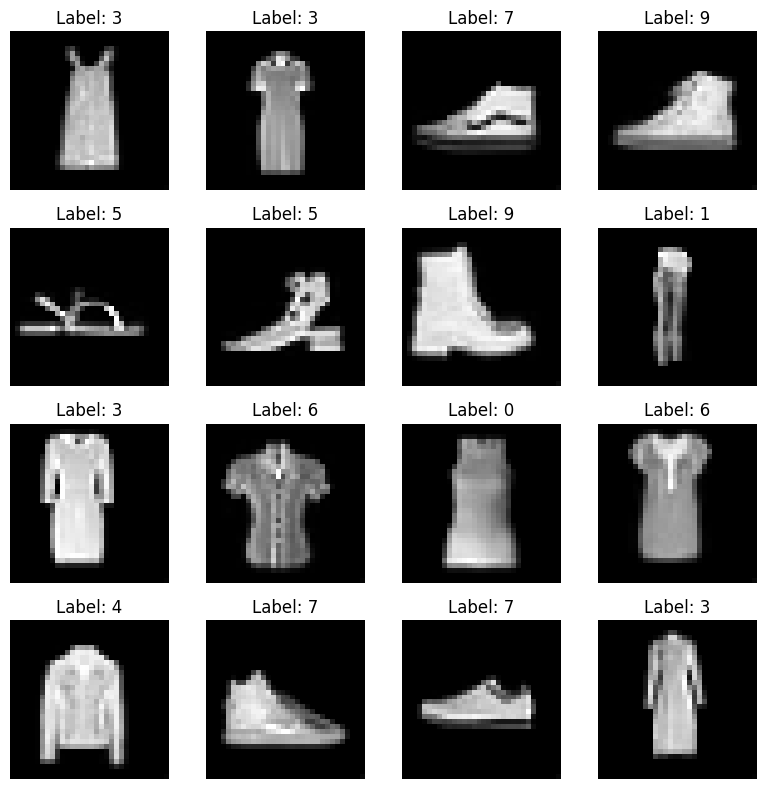

In [6]:
fig, axs = plt.subplots(4, 4, figsize=(8,8))
axs = axs.flatten()

for image_index, ax in enumerate(axs):
    image_pixels = df.iloc[image_index, 1:].values
    # Reshape the pixel values into a 32x32 image
    image = image_pixels.reshape(32,32)
    label_image = df['label'][image_index]
    
    ax.imshow(image, cmap='gray', extent=[0, 1, 0, 1])
    ax.set_title(f"Label: {label_image}")
    ax.axis('off')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

## II. Použítí modelů machine learningu

### II(a). Rozdělení dat

In [7]:
import torch
from torch.utils.data import DataLoader
from torch import nn
import torch.nn.functional as F
from tqdm import tqdm

Nejprve, podívám se, je-li grafická karta k dispozici. Pokud ano, tak budeme trénovat pomocí ní, jinak pomocí procesoru.

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


Rozdělím si dataset na cílovou proměnnou (v našem případě to je 'Label'), kterou chci predikovat, a na matici pixelů, pomocí kterou budu predikovat.

In [9]:
from sklearn.model_selection import train_test_split

Xdata = df.drop('label', axis=1)
ydata = df['label']

Ted' už rozdělím data na trénovací a testovací množiny v poměru 60:40.

In [10]:
rd_seed = 100

Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size=0.4, random_state=rd_seed) 
display(Xtrain.shape)
display(ytrain.shape)
display(Xtest.shape)
display(ytest.shape)

(31500, 1024)

(31500,)

(21000, 1024)

(21000,)

Rozdělím testovací množinu na validační a testovací.

In [11]:
Xval, Xtest, yval, ytest = train_test_split(Xtest, ytest, test_size=0.5, random_state=rd_seed) 
display(Xval.shape)
display(yval.shape)
display(Xtest.shape)
display(ytest.shape)

(10500, 1024)

(10500,)

(10500, 1024)

(10500,)

Applikuju metody standardizace a normalizace dat

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler_standard = StandardScaler()
Xtrain_standard = scaler_standard.fit_transform(Xtrain)
Xval_standard = scaler_standard.transform(Xval)
Xtest_standard = scaler_standard.transform(Xtest)

scaler_min_max = MinMaxScaler()
Xtrain_min_max = scaler_min_max.fit_transform(Xtrain)
Xval_min_max = scaler_min_max.transform(Xval)
Xtest_min_max = scaler_min_max.transform(Xtest)

Vytvořím tensory a dataloadery našich dat pro snadné trénování neuronových sítí

In [13]:
from torch.utils.data import TensorDataset, DataLoader

def create_tensor_dataset(X, y, device=torch.device(device)):
    X_tensor = torch.tensor(X, dtype=torch.float).to(device)
    y_tensor = torch.tensor(y, dtype=torch.long).to(device)
    dataset = TensorDataset(X_tensor, y_tensor)
    return dataset

def create_data_loaders(train_dataset, val_dataset, test_dataset, batch_size_train=64, batch_size_val=128, batch_size_test=128):
    train_loader = DataLoader(train_dataset, batch_size=batch_size_train, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size_val, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size_test, shuffle=False)
    return train_loader, val_loader, test_loader

In [14]:
train_dataset = create_tensor_dataset(Xtrain.values.reshape(-1, 1, 32, 32), ytrain.values, device)
val_dataset = create_tensor_dataset(Xval.values.reshape(-1, 1, 32, 32), yval.values, device)
test_dataset = create_tensor_dataset(Xtest.values.reshape(-1, 1, 32, 32), ytest.values, device)

train_loader, val_loader, test_loader = create_data_loaders(train_dataset, val_dataset, test_dataset)

In [15]:
train_dataset_stand = create_tensor_dataset(Xtrain_standard.reshape(-1, 1, 32, 32), ytrain.values, device)
val_dataset_stand = create_tensor_dataset(Xval_standard.reshape(-1, 1, 32, 32), yval.values, device)
test_dataset_stand = create_tensor_dataset(Xtest_standard.reshape(-1, 1, 32, 32), ytest.values, device)

train_loader_stand, val_loader_stand, test_loader_stand = create_data_loaders(train_dataset_stand, val_dataset_stand, test_dataset_stand)

In [16]:
train_dataset_min_max = create_tensor_dataset(Xtrain_min_max.reshape(-1, 1, 32, 32), ytrain.values, device)
val_dataset_min_max = create_tensor_dataset(Xval_min_max.reshape(-1, 1, 32, 32), yval.values, device)
test_dataset_min_max = create_tensor_dataset(Xtest_min_max.reshape(-1, 1, 32, 32), ytest.values, device)

train_loader_min_max, val_loader_min_max, test_loader_min_max = create_data_loaders(train_dataset_min_max, val_dataset_min_max, test_dataset_min_max)

Vytvořím slovník pro naše modely a metody ladění modelů

In [17]:
accuracy = {
    'MLP': [],
    'CNN': []
}

### II(b). Implementace a použití modelů FeedForward Neural Network

Použiju model dopředné neuronové sítě a budu ho ladit pomocí různých technik

#### II(b). Original

Nejprve, zkusím model dopředné neuronové sítě na původních datech a zároven vyladím model na různých hloubkách a velikostech vrstev

Vytvořím dávky dat pro snadné trénování a menší zatížení paměti grafické karty

In [18]:
dataiter = iter(train_loader)
pixels, labels = next(dataiter)
batch = next(dataiter)

print(pixels.shape)
print(labels.shape)

torch.Size([64, 1, 32, 32])
torch.Size([64])


Vytvořím mřížku parametrů pro ladění dopředné neuronové síti

In [19]:
networks = [
    {'hidden_layers': [64, 32], 'output_size': 10},  # Network with 2 hidden layers, 64 and 32 units
    {'hidden_layers': [128, 64, 32], 'output_size': 10},  # Network with 3 hidden layers, 128, 64, and 32 units
    {'hidden_layers': [256, 128, 64], 'output_size': 20},
    {'hidden_layers': [512, 256, 128, 64], 'output_size': 20},
    {'hidden_layers': [1024, 512, 256, 128], 'output_size': 40}
]

Napíšu třídu dopředné neuronové síti s nastavitelnou hloubkou a velikostmi každou vrstvy

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_layers[0])
        self.hidden_layers = nn.ModuleList([nn.Linear(hidden_layers[i], hidden_layers[i+1]) for i in range(len(hidden_layers)-1)])
        self.output = nn.Linear(hidden_layers[-1], output_size)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        for layer in self.hidden_layers:
            x = F.relu(layer(x))
        x = self.output(x)
        return x

model = MLP(32*32, [64,32], 10).to(device)

In [21]:
outputs = model(pixels)
print(pixels.shape, outputs.shape)

torch.Size([64, 1, 32, 32]) torch.Size([64, 10])


Použiju kategorickou relativní entropii a kouknu se na průměrnou chybu predikcí

In [22]:
loss_fn = torch.nn.CrossEntropyLoss()

outputs = model(pixels)
loss = loss_fn(outputs, labels)
print('Total loss for this batch: {}'.format(loss.item()))

Total loss for this batch: 8.4452486038208


Jako první optimizer použiju algoritmus Adam

In [23]:
# Optimizers specified in the torch.optim package
optimizer = torch.optim.Adam(model.parameters())

Napíšu funkci pro trénování jedne epochy

In [24]:
def train_one_epoch(model, loss_fn, optimizer, train_loader):
    running_cum_loss = 0.

    for i, data in enumerate(train_loader):
        inputs, labels = data
    
        # Reshape the pixels to match the input size expected by the model
        inputs = inputs.view(-1, 32, 32)  # Assuming input size is 32x32
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)

        loss.backward()
        optimizer.step()

        running_cum_loss += loss.item() * inputs.shape[0]
            
    return running_cum_loss / len(train_loader.dataset)

Podívám se na celkovou chybu predikcí

In [25]:
loss = train_one_epoch(model, loss_fn, optimizer, train_loader)
print(f"Total training loss: {loss}")

Total training loss: 1.0360088359212118


Ted, už začnu trénování modelů na různých parametrech na 15 epochách s technikou předčasné zastavení, zjistím nejlepší parametry modelu na původních datech a uložím model do složky

In [27]:
# Initialize the best validation loss
best_vloss = float('inf')  # Positive infinity to ensure the first validation loss is always better
best_mlp = {}

# Loop through each network configuration
for index, network in enumerate(networks):
    input_size = 32 * 32  # Input image size
    output_size = network['output_size']  # Output size for classification
    hidden_layers = network['hidden_layers']  # Hidden layer sizes
    
    # Create an instance of MyNet with the specified architecture
    model = MLP(input_size, hidden_layers, output_size).to(device)
    loss_fn = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters())

    MAX_EPOCHS = 15
    K_EPOCHS = 5
    
    epochs = []
    train_loss = []
    validation_loss = []
    epochs_from_best = 0
    
    for epoch in range(MAX_EPOCHS):    
        model.train(True)
    
        # One training step
        avg_loss = train_one_epoch(model, loss_fn, optimizer, train_loader)

        model.train(False)
    
        # Validation performance
        running_cum_vloss = 0.0
        vcorrect = 0
        for i, vdata in enumerate(val_loader):
            vinputs, vlabels = vdata
            with torch.no_grad():
                voutputs = model(vinputs)
                vloss = loss_fn(voutputs, vlabels)
            running_cum_vloss += vloss * vinputs.shape[0]
            # count the correctly classified samples
            vcorrect += (voutputs.argmax(1) == vlabels).float().sum()
        # Get average loss and accuracy
        avg_vloss = running_cum_vloss / len(val_dataset)
        vacc = vcorrect / len(val_dataset)
    
        # Save the model if the validation loss improves
        if avg_vloss < best_vloss:
            best_vloss = avg_vloss
            model_path = f"saves/best_model_mlp.pt"  # Save models with different output sizes separately
            torch.save(model.state_dict(), model_path)
            best_mlp[index] = round(best_vloss.item(), 3)
            epochs_from_best = 0
        else:
            epochs_from_best += 1
            
        # EARLY STOPPING
        if epochs_from_best > K_EPOCHS:
            break

In [29]:
print(best_mlp)
index = min(best_mlp, key=best_mlp.get)
print(networks[index])
print(best_mlp[index])

model_path = "saves/best_model_mlp.pt"
# načteme nejlepší model
model_mlp = MLP(input_size=32*32, hidden_layers=networks[index]['hidden_layers'], output_size=networks[index]['output_size']).to(device)
    
# Load the model's state dictionary
model_mlp.load_state_dict(torch.load(model_path))

{0: 0.506, 1: 0.48, 3: 0.454}
{'hidden_layers': [512, 256, 128, 64], 'output_size': 20}
0.454


<All keys matched successfully>

Jsou to nejlepší parametry modelu dopředné neuronové síti na originálních datech

Podívám se na predikce pravděpodobností

In [30]:
with torch.no_grad():
    print(model_mlp(pixels).argmax(1) == labels.flatten())
    print(model_mlp(pixels).argmax(1))

print(labels.flatten())

tensor([ True,  True,  True, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True, False,  True,  True,  True,
         True, False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True], device='cuda:0')
tensor([3, 6, 1, 2, 0, 9, 7, 5, 8, 1, 9, 8, 3, 2, 9, 9, 6, 2, 7, 3, 8, 9, 2, 0,
        2, 5, 2, 5, 9, 9, 5, 3, 8, 0, 3, 0, 7, 0, 3, 3, 7, 1, 7, 7, 3, 1, 1, 9,
        3, 7, 1, 4, 5, 1, 0, 6, 3, 6, 2, 5, 9, 3, 5, 0], device='cuda:0')
tensor([3, 6, 1, 6, 0, 9, 7, 5, 8, 1, 9, 8, 3, 6, 9, 9, 6, 2, 7, 3, 8, 9, 2, 0,
        2, 5, 4, 5, 9, 9, 5, 6, 8, 0, 3, 0, 7, 0, 3, 3, 7, 1, 7, 7, 3, 1, 1, 9,
        4, 7, 1, 4, 5, 1, 0, 6, 3, 6, 2, 5, 9, 3, 5, 0], device='cuda:0')


Podívám se na přesnost na validačních datech a matici záměn a uložím přesnost tohoto modelu do slovníku

In [31]:
from sklearn.metrics import accuracy_score

val_predictions = np.zeros(len(val_loader.dataset))
val_y = np.zeros(len(val_loader.dataset))
ii = 0
for vdata in val_loader:
    vinputs, vlabels = vdata
    with torch.no_grad():
        voutputs = model_mlp(vinputs)
        vloss = loss_fn(voutputs, vlabels)
    val_predictions[ii:(ii + vinputs.shape[0])] = voutputs.argmax(1).cpu().numpy()
    val_y[ii:(ii + vinputs.shape[0])] = vlabels.cpu().numpy()

    ii += vinputs.shape[0]
    
print(f"Validacni přesnost: {accuracy_score(val_y, val_predictions)}")

# Confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(val_y, val_predictions)
print(cnf_matrix)

accuracy['MLP'].append(round(accuracy_score(val_y, val_predictions),6))

Validacni přesnost: 0.8404761904761905
[[ 952    3   24   48    2    0   41    0   10    0]
 [  11 1059    3   16    2    0    1    0    0    0]
 [   7    7  804   11  112    0   79    0   16    0]
 [  59   12   19  856   53    0   10    0    5    0]
 [   4    2  151   29  687    0  105    0   11    0]
 [   1    3    0    0    0  959    0   69    6   42]
 [ 273    3  140   34   62    1  492    0   24    0]
 [   0    0    0    0    0   18    0  960    1   63]
 [   4    1    8    7    3    3    8    5 1046    0]
 [   0    1    1    1    0    8    0   31    1 1010]]


In [32]:
accuracy

{'MLP': [0.840476], 'CNN': []}

#### II(b). Standard

Udělám předchozí procedury trénování modelů, ale ted už na standardních datech

In [33]:
dataiter = iter(train_loader_stand)
pixels, labels = next(dataiter)
batch = next(dataiter)

print(pixels.shape)
print(labels.shape)

torch.Size([64, 1, 32, 32])
torch.Size([64])


In [34]:
model = MLP(32*32, [64,32], 10).to(device)
outputs = model(pixels)

loss_fn = torch.nn.CrossEntropyLoss()

outputs = model(pixels)
loss = loss_fn(outputs, labels)
print('Total loss for this batch: {}'.format(loss.item()))

optimizer = torch.optim.Adam(model.parameters())

loss = train_one_epoch(model, loss_fn, optimizer, train_loader_stand)
print(f"Total training loss: {loss}")

Total loss for this batch: 2.3410532474517822
Total training loss: 0.7822901890391395


In [35]:
# Initialize the best validation loss
best_vloss = float('inf')  # Positive infinity to ensure the first validation loss is always better
best_mlp_stand = {}

# Loop through each network configuration
for index, network in enumerate(networks):
    input_size = 32 * 32  # Input image size
    output_size = network['output_size']  # Output size for classification
    hidden_layers = network['hidden_layers']  # Hidden layer sizes
    
    # Create an instance of MyNet with the specified architecture
    model = MLP(input_size, hidden_layers, output_size).to(device)
    loss_fn = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters())

    MAX_EPOCHS = 15
    K_EPOCHS = 5
    
    epochs = []
    train_loss = []
    validation_loss = []
    epochs_from_best = 0
    
    for epoch in range(MAX_EPOCHS):
        model.train(True)
    
        # One training step
        avg_loss = train_one_epoch(model, loss_fn, optimizer, train_loader_stand)

        model.train(False)
    
        # Validation performance
        running_cum_vloss = 0.0
        vcorrect = 0
        for i, vdata in enumerate(val_loader_stand):
            vinputs, vlabels = vdata
            with torch.no_grad():
                voutputs = model(vinputs)
                vloss = loss_fn(voutputs, vlabels)
            running_cum_vloss += vloss * vinputs.shape[0]
            # count the correctly classified samples
            vcorrect += (voutputs.argmax(1) == vlabels).float().sum()
        # Get average loss and accuracy
        avg_vloss = running_cum_vloss / len(val_dataset_stand)
        vacc = vcorrect / len(val_dataset_stand)
    
        # Save the model if the validation loss improves
        if avg_vloss < best_vloss:
            best_vloss = avg_vloss
            model_path = f"saves/best_model_mlp_stand.pt"  # Save models with different output sizes separately
            torch.save(model.state_dict(), model_path)
            best_mlp_stand[index] = round(best_vloss.item(), 3)
            epochs_from_best = 0
        else:
            epochs_from_best += 1
            
        # EARLY STOPPING
        if epochs_from_best > K_EPOCHS:
            break

In [36]:
print(best_mlp_stand)
index = min(best_mlp_stand, key=best_mlp_stand.get)
print(networks[index])
print(best_mlp_stand[index])

model_path = "saves/best_model_mlp_stand.pt"
# načteme nejlepší model
model_mlp_stand = MLP(input_size=32*32, hidden_layers=networks[index]['hidden_layers'], output_size=networks[index]['output_size']).to(device)
    
# Load the model's state dictionary
model_mlp_stand.load_state_dict(torch.load(model_path))

{0: 0.485, 1: 0.452}
{'hidden_layers': [128, 64, 32], 'output_size': 10}
0.452


<All keys matched successfully>

In [37]:
with torch.no_grad():
    print(model_mlp_stand(pixels).argmax(1) == labels.flatten())
    print(model_mlp_stand(pixels).argmax(1))

print(labels.flatten())

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True, False,
         True,  True,  True,  True,  True, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True, False,  True,  True,  True,
         True, False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True,  True], device='cuda:0')
tensor([4, 4, 7, 9, 1, 5, 9, 9, 0, 5, 2, 0, 3, 2, 4, 6, 2, 7, 3, 7, 2, 2, 8, 7,
        9, 8, 6, 5, 9, 1, 5, 4, 1, 5, 9, 5, 3, 3, 6, 5, 5, 4, 8, 1, 2, 2, 5, 7,
        8, 1, 8, 1, 5, 1, 0, 5, 5, 5, 6, 9, 4, 2, 9, 9], device='cuda:0')
tensor([4, 4, 7, 9, 1, 5, 9, 9, 0, 7, 2, 0, 3, 2, 4, 2, 2, 7, 3, 7, 2, 2, 8, 7,
        9, 8, 0, 5, 9, 1, 5, 3, 1, 5, 9, 5, 3, 3, 6, 5, 5, 4, 8, 1, 6, 2, 5, 7,
        8, 1, 8, 1, 5, 1, 0, 5, 5, 5, 2, 9, 4, 2, 9, 9], device='cuda:0')


In [38]:
from sklearn.metrics import accuracy_score

val_predictions = np.zeros(len(val_loader_stand.dataset))
val_y = np.zeros(len(val_loader_stand.dataset))
ii = 0
for vdata in val_loader_stand:
    vinputs, vlabels = vdata
    with torch.no_grad():
        voutputs = model_mlp_stand(vinputs)
        vloss = loss_fn(voutputs, vlabels)
    val_predictions[ii:(ii + vinputs.shape[0])] = voutputs.argmax(1).cpu().numpy()
    val_y[ii:(ii + vinputs.shape[0])] = vlabels.cpu().numpy()

    ii += vinputs.shape[0]
    
print(f"Validacni přesnost: {accuracy_score(val_y, val_predictions)}")

# Confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(val_y, val_predictions)
print(cnf_matrix)

accuracy['MLP'].append(round(accuracy_score(val_y, val_predictions),6))

Validacni přesnost: 0.8372380952380952
[[ 901    3   12   69    9    4   72    0   10    0]
 [   2 1058    3   17    7    0    5    0    0    0]
 [  12    1  748    9  163    0   81    0   22    0]
 [  39   20    6  864   57    0   24    0    4    0]
 [   1    1   79   32  796    0   74    0    6    0]
 [   2    0   12    0    0  957    2   68   10   29]
 [ 188    6   92   48  128    0  542    0   24    1]
 [   0    0    0    0    0   72    0  923    4   43]
 [   8    0    5    8    9    8   10    5 1031    1]
 [   0    0    0    1    0   15    0   59    7  971]]


Přesnost se trochu zmenšila, ale budu dál zkoušet různé techniky předzpracování dat, ladění modelů neuronových sítí

In [39]:
accuracy

{'MLP': [0.840476, 0.837238], 'CNN': []}

#### II(b). MinMax

Udělám předchozí procedury trénování modelů, ale ted zkusím na datech s MinMax normalizací

In [40]:
dataiter = iter(train_loader_min_max)
pixels, labels = next(dataiter)
batch = next(dataiter)

print(pixels.shape)
print(labels.shape)

torch.Size([64, 1, 32, 32])
torch.Size([64])


In [41]:
model = MLP(32*32, [64,32], 10).to(device)
outputs = model(pixels)

loss_fn = torch.nn.CrossEntropyLoss()

outputs = model(pixels)
loss = loss_fn(outputs, labels)
print('Total loss for this batch: {}'.format(loss.item()))

optimizer = torch.optim.Adam(model.parameters())

loss = train_one_epoch(model, loss_fn, optimizer, train_loader_min_max)
print(f"Total training loss: {loss}")

Total loss for this batch: 2.367041826248169
Total training loss: 0.982072115186661


In [42]:
# Initialize the best validation loss
best_vloss = float('inf')  # Positive infinity to ensure the first validation loss is always better
best_mlp_min_max = {}

# Loop through each network configuration
for index, network in enumerate(networks):
    input_size = 32 * 32  # Input image size
    output_size = network['output_size']  # Output size for classification
    hidden_layers = network['hidden_layers']  # Hidden layer sizes
    
    # Create an instance of MyNet with the specified architecture
    model = MLP(input_size, hidden_layers, output_size).to(device)
    loss_fn = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters())

    MAX_EPOCHS = 15
    K_EPOCHS = 5
    
    epochs = []
    train_loss = []
    validation_loss = []
    epochs_from_best = 0

    for epoch in range(MAX_EPOCHS):
        model.train(True)
    
        # One training step
        avg_loss = train_one_epoch(model, loss_fn, optimizer, train_loader_min_max)

        model.train(False)
    
        # Validation performance
        running_cum_vloss = 0.0
        vcorrect = 0
        for i, vdata in enumerate(val_loader_min_max):
            vinputs, vlabels = vdata
            with torch.no_grad():
                voutputs = model(vinputs)
                vloss = loss_fn(voutputs, vlabels)
            running_cum_vloss += vloss * vinputs.shape[0]
            # count the correctly classified samples
            vcorrect += (voutputs.argmax(1) == vlabels).float().sum()
        # Get average loss and accuracy
        avg_vloss = running_cum_vloss / len(val_dataset_min_max)
        vacc = vcorrect / len(val_dataset_min_max)
    
        # Save the model if the validation loss improves
        if avg_vloss < best_vloss:
            best_vloss = avg_vloss
            model_path = f"saves/best_model_mlp_min_max.pt"  # Save models with different output sizes separately
            torch.save(model.state_dict(), model_path)
            best_mlp_min_max[index] = round(best_vloss.item(), 3)
            epochs_from_best = 0
        else:
            epochs_from_best += 1
            
        # EARLY STOPPING
        if epochs_from_best > K_EPOCHS:
            break

In [43]:
print(best_mlp_min_max)
index = min(best_mlp_min_max, key=best_mlp_min_max.get)
print(networks[index])
print(best_mlp_min_max[index])

model_path = "saves/best_model_mlp_min_max.pt"
# načteme nejlepší model
model_mlp_min_max = MLP(input_size=32*32, hidden_layers=networks[index]['hidden_layers'], output_size=networks[index]['output_size']).to(device)
    
# Load the model's state dictionary
model_mlp_min_max.load_state_dict(torch.load(model_path))

{0: 0.45}
{'hidden_layers': [64, 32], 'output_size': 10}
0.45


<All keys matched successfully>

In [44]:
with torch.no_grad():
    print(model_mlp_min_max(pixels).argmax(1) == labels.flatten())
    print(model_mlp_min_max(pixels).argmax(1))

print(labels.flatten())

tensor([ True,  True,  True,  True,  True,  True,  True, False,  True,  True,
         True,  True,  True, False,  True,  True,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False,  True,  True,
         True,  True,  True,  True], device='cuda:0')
tensor([6, 4, 3, 5, 5, 2, 6, 9, 0, 6, 1, 5, 4, 3, 4, 7, 6, 6, 4, 3, 4, 1, 4, 7,
        7, 7, 5, 9, 4, 5, 0, 5, 9, 5, 7, 2, 1, 7, 3, 9, 9, 5, 2, 6, 5, 3, 3, 9,
        4, 9, 9, 3, 2, 6, 0, 7, 7, 4, 7, 3, 5, 7, 4, 3], device='cuda:0')
tensor([6, 4, 3, 5, 5, 2, 6, 7, 0, 6, 1, 5, 4, 0, 4, 7, 6, 6, 6, 3, 4, 1, 4, 7,
        7, 7, 5, 9, 4, 5, 0, 5, 9, 5, 7, 2, 1, 7, 0, 9, 9, 5, 6, 2, 5, 3, 3, 9,
        4, 9, 9, 3, 2, 6, 0, 7, 7, 6, 7, 3, 5, 7, 4, 3], device='cuda:0')


In [45]:
from sklearn.metrics import accuracy_score

val_predictions = np.zeros(len(val_loader_min_max.dataset))
val_y = np.zeros(len(val_loader_min_max.dataset))
ii = 0
for vdata in val_loader_min_max:
    vinputs, vlabels = vdata
    with torch.no_grad():
        voutputs = model_mlp_min_max(vinputs)
        vloss = loss_fn(voutputs, vlabels)
    val_predictions[ii:(ii + vinputs.shape[0])] = voutputs.argmax(1).cpu().numpy()
    val_y[ii:(ii + vinputs.shape[0])] = vlabels.cpu().numpy()

    ii += vinputs.shape[0]
    
print(f"Validacni přesnost: {accuracy_score(val_y, val_predictions)}")

# Confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(val_y, val_predictions)
print(cnf_matrix)

accuracy['MLP'].append(round(accuracy_score(val_y, val_predictions),6))

Validacni přesnost: 0.8368571428571429
[[ 885    8   17   56    4    2  100    0    8    0]
 [   2 1066    1   15    1    0    7    0    0    0]
 [  10    8  714   12  156    0  122    0   14    0]
 [  43   28   14  853   44    0   30    0    2    0]
 [   6    5   69   32  781    0   94    0    2    0]
 [   1    0    0    0    0  959    1   82    4   33]
 [ 167    8   96   44   99    0  597    0   18    0]
 [   0    0    0    0    0   49    0  932    1   60]
 [   5    0    8   11    7    9   13    5 1025    2]
 [   1    4    0    0    1   21    0   51    0  975]]


Přesnost je skoro stejná jako na datech se standardizací, ale je také menší než na původnch datech

In [46]:
accuracy

{'MLP': [0.840476, 0.837238, 0.836857], 'CNN': []}

#### II(b). Dropout

Ted zkusím dropout regularizaci. Napíšu novou třídu s implementací atributu dropout. A pak provedu té samé procedury trénování modelů

In [47]:
class MLPDropout(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size, dropout_p=0.1):
        super(MLPDropout, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_layers[0])
        self.hidden_layers = nn.ModuleList([nn.Linear(hidden_layers[i], hidden_layers[i+1]) for i in range(len(hidden_layers)-1)])
        self.output = nn.Linear(hidden_layers[-1], output_size)
        self.dropout = nn.Dropout(dropout_p)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        for layer in self.hidden_layers:
            x = F.relu(layer(x))
        x = self.output(x)
        return x

# Example usage
model = MLPDropout(32*32, [64,32], 10, dropout_p=0.1).to(device)

In [48]:
dataiter = iter(train_loader)
pixels, labels = next(dataiter)
batch = next(dataiter)

print(pixels.shape)
print(labels.shape)

torch.Size([64, 1, 32, 32])
torch.Size([64])


In [49]:
model = MLPDropout(32*32, [64,32], 10).to(device)
outputs = model(pixels)

loss_fn = torch.nn.CrossEntropyLoss()

outputs = model(pixels)
loss = loss_fn(outputs, labels)
print('Total loss for this batch: {}'.format(loss.item()))

optimizer = torch.optim.Adam(model.parameters())

loss = train_one_epoch(model, loss_fn, optimizer, train_loader)
print(f"Total training loss: {loss}")

Total loss for this batch: 12.104911804199219
Total training loss: 1.1958602135597713


In [51]:
# Initialize the best validation loss
best_vloss = float('inf')  # Positive infinity to ensure the first validation loss is always better
best_mlp_drop = {}

# Loop through each network configuration
for index, network in enumerate(networks):
    input_size = 32 * 32  # Input image size
    output_size = network['output_size']  # Output size for classification
    hidden_layers = network['hidden_layers']  # Hidden layer sizes
    
    # Create an instance of MyNet with the specified architecture
    model = MLPDropout(input_size, hidden_layers, output_size, 0.1).to(device)
    loss_fn = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters())

    MAX_EPOCHS = 15
    K_EPOCHS = 5
    
    epochs = []
    train_loss = []
    validation_loss = []
    epochs_from_best = 0
    
    for epoch in range(MAX_EPOCHS):    
        model.train(True)
    
        # One training step
        avg_loss = train_one_epoch(model, loss_fn, optimizer, train_loader)

        model.train(False)
    
        # Validation performance
        running_cum_vloss = 0.0
        vcorrect = 0
        for i, vdata in enumerate(val_loader):
            vinputs, vlabels = vdata
            with torch.no_grad():
                voutputs = model(vinputs)
                vloss = loss_fn(voutputs, vlabels)
            running_cum_vloss += vloss * vinputs.shape[0]
            # count the correctly classified samples
            vcorrect += (voutputs.argmax(1) == vlabels).float().sum()
        # Get average loss and accuracy
        avg_vloss = running_cum_vloss / len(val_dataset)
        vacc = vcorrect / len(val_dataset)
    
        # Save the model if the validation loss improves
        if avg_vloss < best_vloss:
            best_vloss = avg_vloss
            model_path = f"saves/best_model_mlp_drop.pt"  # Save models with different output sizes separately
            torch.save(model.state_dict(), model_path)
            best_mlp_drop[index] = round(best_vloss.item(), 3)
            epochs_from_best = 0
        else:
            epochs_from_best += 1
            
        # EARLY STOPPING
        if epochs_from_best > K_EPOCHS:
            break

In [53]:
print(best_mlp_drop)
index = min(best_mlp_drop, key=best_mlp_drop.get)
print(networks[index])
print(best_mlp_drop[index])

model_path = "saves/best_model_mlp_drop.pt"
# načteme nejlepší model
model_mlp_drop = MLPDropout(input_size=32*32, 
                            hidden_layers=networks[index]['hidden_layers'], 
                            output_size=networks[index]['output_size'], 
                            dropout_p=0.1).to(device)
    
# Load the model's state dictionary
model_mlp_drop.load_state_dict(torch.load(model_path))

{0: 0.545, 1: 0.47}
{'hidden_layers': [128, 64, 32], 'output_size': 10}
0.47


<All keys matched successfully>

In [54]:
with torch.no_grad():
    print(model_mlp_drop(pixels).argmax(1) == labels.flatten())
    print(model_mlp_drop(pixels).argmax(1))

print(labels.flatten())

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True, False,  True,  True, False,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True, False,  True,  True,  True, False,  True,  True,
         True,  True,  True,  True, False, False,  True,  True,  True, False,
        False,  True,  True,  True,  True,  True,  True,  True,  True, False,
         True,  True,  True,  True], device='cuda:0')
tensor([4, 1, 5, 5, 3, 4, 1, 3, 7, 5, 0, 6, 8, 8, 6, 5, 4, 5, 7, 7, 0, 5, 1, 0,
        3, 0, 8, 1, 3, 8, 8, 9, 9, 6, 1, 1, 3, 2, 0, 0, 8, 7, 7, 1, 6, 0, 8, 6,
        5, 2, 2, 8, 3, 0, 3, 0, 7, 9, 2, 5, 6, 7, 8, 9], device='cuda:0')
tensor([4, 1, 5, 5, 3, 4, 1, 3, 7, 5, 0, 4, 8, 8, 6, 7, 4, 5, 7, 7, 0, 5, 1, 0,
        3, 0, 8, 1, 4, 8, 8, 9, 9, 0, 1, 1, 3, 6, 0, 0, 8, 7, 7, 1, 4, 3, 8, 6,
        5, 2, 6, 8, 3, 0, 3, 0, 7, 9, 2, 5, 6, 7, 8, 9], device='cuda:0')


In [55]:
from sklearn.metrics import accuracy_score

val_predictions = np.zeros(len(val_loader.dataset))
val_y = np.zeros(len(val_loader.dataset))
ii = 0
for vdata in val_loader:
    vinputs, vlabels = vdata
    with torch.no_grad():
        voutputs = model_mlp_drop(vinputs)
        vloss = loss_fn(voutputs, vlabels)
    val_predictions[ii:(ii + vinputs.shape[0])] = voutputs.argmax(1).cpu().numpy()
    val_y[ii:(ii + vinputs.shape[0])] = vlabels.cpu().numpy()

    ii += vinputs.shape[0]
    
print(f"Validacni přesnost: {accuracy_score(val_y, val_predictions)}")

# Confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(val_y, val_predictions)
print(cnf_matrix)

accuracy['MLP'].append(round(accuracy_score(val_y, val_predictions),6))

Validacni přesnost: 0.8199047619047619
[[ 987    3   12   47    1    1   25    0    4    0]
 [  13 1032    1   38    4    0    2    0    0    2]
 [  44    4  765   10  128    0   76    0    9    0]
 [  95   20    3  837   27    1   27    0    4    0]
 [   5    0  138   82  680    0   81    0    3    0]
 [   1    0    0    1    0  964    1   61   10   42]
 [ 310    4  136   35   96    1  426    0   21    0]
 [   0    0    0    0    0   47    0  915    7   73]
 [  14    0   12   13    4   10   13    8 1009    2]
 [   1    0    1    0    0   16    0   41    0  994]]


Bohužel, dropout regularizace ještě víc zhoršila přesnost

In [56]:
accuracy

{'MLP': [0.840476, 0.837238, 0.836857, 0.819905], 'CNN': []}

#### II(b). Dropout + L1reg

Zkusím kombinaci regularizací Dropout a L1

In [57]:
dataiter = iter(train_loader)
pixels, labels = next(dataiter)
batch = next(dataiter)

print(pixels.shape)
print(labels.shape)

torch.Size([64, 1, 32, 32])
torch.Size([64])


In [58]:
model = MLPDropout(32*32, [64,32], 10).to(device)
outputs = model(pixels)
print(pixels.shape, outputs.shape)

loss_fn = torch.nn.CrossEntropyLoss()

outputs = model(pixels)
loss = loss_fn(outputs, labels)
print('Total loss for this batch: {}'.format(loss.item()))

optimizer = torch.optim.Adam(model.parameters())

torch.Size([64, 1, 32, 32]) torch.Size([64, 10])
Total loss for this batch: 10.525484085083008


Pro trénování modelů napíšu novou funkci s přidáním L1 regularizace, ale stále budu používat instanci nové třídy Dropout

In [59]:
def train_one_epoch_l1reg(model, loss_fn, optimizer, train_loader, l1_lambda=0.1):
    running_cum_loss = 0.

    for i, data in enumerate(train_loader):
        inputs, labels = data
    
        # Reshape the pixels to match the input size expected by the model
        inputs = inputs.view(-1, 32, 32)  # Assuming input size is 32x32
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)

        l1_reg = torch.tensor(0., device='cuda:0')
        l1_reg += torch.linalg.vector_norm(model.output.weight.flatten(),1)

        loss = loss + l1_lambda*l1_reg
        
        # Backpropagation
        loss.backward()

        # Adjust learning weights
        optimizer.step()
        
        running_cum_loss += loss.item() * inputs.shape[0]
            
    return running_cum_loss / len(train_loader.dataset)

In [60]:
loss = train_one_epoch_l1reg(model, loss_fn, optimizer, train_loader)
print(f"Celková trénovací chyba: {loss}")

Celková trénovací chyba: 2.1898035631028434


In [61]:
# Initialize the best validation loss
best_vloss = float('inf')  # Positive infinity to ensure the first validation loss is always better
best_mlp_drop_l1reg = {}

# Loop through each network configuration
for index, network in enumerate(networks):
    input_size = 32 * 32  # Input image size
    output_size = network['output_size']  # Output size for classification
    hidden_layers = network['hidden_layers']  # Hidden layer sizes
    
    # Create an instance of MyNet with the specified architecture
    model = MLPDropout(input_size, hidden_layers, output_size, 0.1).to(device)
    loss_fn = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters())

    MAX_EPOCHS = 15
    K_EPOCHS = 3
    
    epochs = []
    train_loss = []
    validation_loss = []
    epochs_from_best = 0

    for epoch in range(MAX_EPOCHS):
        model.train(True)
    
        # One training step
        avg_loss = train_one_epoch_l1reg(model, loss_fn, optimizer, train_loader)

        model.train(False)
    
        # Validation performance
        running_cum_vloss = 0.0
        vcorrect = 0
        for i, vdata in enumerate(val_loader):
            vinputs, vlabels = vdata
            with torch.no_grad():
                voutputs = model(vinputs)
                vloss = loss_fn(voutputs, vlabels)
            running_cum_vloss += vloss * vinputs.shape[0]
            # count the correctly classified samples
            vcorrect += (voutputs.argmax(1) == vlabels).float().sum()
        # Get average loss and accuracy
        avg_vloss = running_cum_vloss / len(val_dataset)
        vacc = vcorrect / len(val_dataset)

        # Save the model if the validation loss improves
        if avg_vloss < best_vloss:
            best_vloss = avg_vloss
            model_path = f"saves/best_model_mlp_drop_l1reg.pt"  # Save models with different output sizes separately
            torch.save(model.state_dict(), model_path)
            best_mlp_drop_l1reg[index] = round(best_vloss.item(), 3)
            epochs_from_best = 0
        else:
            epochs_from_best += 1
            
        # EARLY STOPPING
        if epochs_from_best > K_EPOCHS:
            break

In [62]:
print(best_mlp_drop_l1reg)
index = min(best_mlp_drop_l1reg, key=best_mlp_drop_l1reg.get)
print(networks[index])
print(best_mlp_drop_l1reg[index])

model_path = "saves/best_model_mlp_drop_l1reg.pt"
# načteme nejlepší model
model_mlp_drop_l1reg = MLPDropout(input_size=32*32, 
                                  hidden_layers=networks[index]['hidden_layers'], 
                                  output_size=networks[index]['output_size']).to(device)
    
# Load the model's state dictionary
model_mlp_drop_l1reg.load_state_dict(torch.load(model_path))

{0: 0.501}
{'hidden_layers': [64, 32], 'output_size': 10}
0.501


<All keys matched successfully>

In [63]:
with torch.no_grad():
    print(model_mlp_drop_l1reg(pixels).argmax(1) == labels.flatten())
    print(model_mlp_drop_l1reg(pixels).argmax(1))

print(labels.flatten())

tensor([ True, False,  True,  True,  True,  True,  True,  True,  True, False,
         True, False,  True, False,  True, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True, False,  True,  True,  True,  True,
         True,  True,  True,  True, False, False,  True,  True,  True, False,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True], device='cuda:0')
tensor([3, 4, 7, 3, 7, 6, 3, 2, 5, 0, 3, 3, 5, 4, 4, 3, 3, 7, 9, 3, 4, 7, 1, 8,
        4, 5, 5, 7, 9, 2, 9, 5, 6, 3, 6, 4, 0, 6, 7, 7, 9, 5, 0, 8, 0, 2, 9, 6,
        4, 4, 9, 7, 3, 1, 4, 4, 0, 6, 7, 0, 9, 6, 7, 3], device='cuda:0')
tensor([3, 2, 7, 3, 7, 3, 3, 2, 5, 6, 3, 4, 5, 2, 4, 6, 3, 7, 9, 3, 4, 7, 1, 8,
        4, 5, 5, 5, 9, 2, 9, 5, 6, 3, 6, 4, 0, 0, 7, 7, 9, 5, 0, 8, 6, 4, 9, 6,
        4, 2, 9, 7, 3, 1, 4, 4, 0, 0, 7, 0, 9, 6, 7, 4], device='cuda:0')


In [64]:
from sklearn.metrics import accuracy_score

val_predictions = np.zeros(len(val_loader.dataset))
val_y = np.zeros(len(val_loader.dataset))

ii = 0
for vdata in val_loader:
    vinputs, vlabels = vdata
    with torch.no_grad():
        voutputs = model_mlp_drop_l1reg(vinputs)
        vloss = loss_fn(voutputs, vlabels)
    val_predictions[ii:(ii + vinputs.shape[0])] = voutputs.argmax(1).cpu().numpy()
    val_y[ii:(ii + vinputs.shape[0])] = vlabels.cpu().numpy()

    ii += vinputs.shape[0]
    
print(f"Validacni přesnost: {accuracy_score(val_y, val_predictions)}")

# Confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(val_y, val_predictions)
print(cnf_matrix)

accuracy['MLP'].append(round(accuracy_score(val_y, val_predictions),6))

Validacni přesnost: 0.8025714285714286
[[ 865    6   28   94    4    1   67    0   14    1]
 [   4 1049    3   23    3    0    9    0    1    0]
 [   5    6  585   11  275    1  144    0    9    0]
 [  54   31   12  832   59    1   21    0    4    0]
 [   2    4   41   41  802    0   92    0    7    0]
 [   0    1    4    0    0  937    0   80    7   51]
 [ 208    6  117   52  169    0  448    1   28    0]
 [   0    0    0    0    0   31    0  911    2   98]
 [   2    1    9    5   10   11   31   13 1002    1]
 [   1    1    1    2    0   15    1   35    1  996]]


Kombinace dvou regularizací Dropout a L1 zhoršila přesnost ještě víc

In [65]:
accuracy

{'MLP': [0.840476, 0.837238, 0.836857, 0.819905, 0.802571], 'CNN': []}

#### II(b). Dropout + L2reg

Tedy, podívám se jak to bude s L2 regularizací namísto L1

In [66]:
dataiter = iter(train_loader)
pixels, labels = next(dataiter)
batch = next(dataiter)

print(pixels.shape)
print(labels.shape)

torch.Size([64, 1, 32, 32])
torch.Size([64])


In [67]:
model = MLPDropout(32*32, [64,32], 10).to(device)
outputs = model(pixels)
print(pixels.shape, outputs.shape)

loss_fn = torch.nn.CrossEntropyLoss()

outputs = model(pixels)
loss = loss_fn(outputs, labels)
print('Total loss for this batch: {}'.format(loss.item()))

optimizer = torch.optim.Adam(model.parameters())

torch.Size([64, 1, 32, 32]) torch.Size([64, 10])
Total loss for this batch: 16.026247024536133


Napíšu novou funkci trénování s L2 regularizací

In [68]:
def train_one_epoch_l2reg(model, loss_fn, optimizer, train_loader, l2_lambda=0.1):
    running_cum_loss = 0.

    for i, data in enumerate(train_loader):
        inputs, labels = data
    
        # Reshape the pixels to match the input size expected by the model
        inputs = inputs.view(-1, 32, 32)  # Assuming input size is 32x32
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        
        # Calculate L2 regularization term
        l2_reg = torch.tensor(0., device='cuda:0')
        for param in model.parameters():
            l2_reg += torch.norm(param, 2)**2
        
        # Add L2 regularization term to the loss
        loss += 0.5 * l2_lambda * l2_reg

        loss.backward()
        optimizer.step()

        running_cum_loss += loss.item() * inputs.shape[0]
            
    return running_cum_loss / len(train_loader.dataset)

In [69]:
loss = train_one_epoch_l2reg(model, loss_fn, optimizer, train_loader)
print(f"Celková trénovací chyba: {loss}")

Celková trénovací chyba: 1.9727412394417656


In [70]:
# Initialize the best validation loss
best_vloss = float('inf')  # Positive infinity to ensure the first validation loss is always better
best_mlp_drop_l2reg = {}

# Loop through each network configuration
for index, network in enumerate(networks):
    input_size = 32 * 32  # Input image size
    output_size = network['output_size']  # Output size for classification
    hidden_layers = network['hidden_layers']  # Hidden layer sizes
    
    # Create an instance of MyNet with the specified architecture
    model = MLPDropout(input_size, hidden_layers, output_size, 0.1).to(device)
    loss_fn = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters())

    MAX_EPOCHS = 15
    K_EPOCHS = 5
    
    epochs = []
    train_loss = []
    validation_loss = []
    epochs_from_best = 0
    
    for epoch in range(MAX_EPOCHS):    
        model.train(True)
    
        # One training step
        avg_loss = train_one_epoch_l2reg(model, loss_fn, optimizer, train_loader)

        model.train(False)
    
        # Validation performance
        running_cum_vloss = 0.0
        vcorrect = 0
        for i, vdata in enumerate(val_loader):
            vinputs, vlabels = vdata
            with torch.no_grad():
                voutputs = model(vinputs)
                vloss = loss_fn(voutputs, vlabels)
            running_cum_vloss += vloss * vinputs.shape[0]
            # count the correctly classified samples
            vcorrect += (voutputs.argmax(1) == vlabels).float().sum()
        # Get average loss and accuracy
        avg_vloss = running_cum_vloss / len(val_dataset)
        vacc = vcorrect / len(val_dataset)

        # Save the model if the validation loss improves
        if avg_vloss < best_vloss:
            best_vloss = avg_vloss
            model_path = f"saves/best_model_mlp_drop_l2reg.pt"  # Save models with different output sizes separately
            torch.save(model.state_dict(), model_path)
            best_mlp_drop_l2reg[index] = round(best_vloss.item(), 3)
            epochs_from_best = 0
        else:
            epochs_from_best += 1
            
        # EARLY STOPPING
        if epochs_from_best > K_EPOCHS:
            break

In [71]:
print(best_mlp_drop_l2reg)
index = min(best_mlp_drop_l2reg, key=best_mlp_drop_l2reg.get)
print(networks[index])
print(best_mlp_drop_l2reg[index])

model_path = "saves/best_model_mlp_drop_l2reg.pt"
# načteme nejlepší model
model_mlp_drop_l2reg = MLPDropout(input_size=32*32, 
                                  hidden_layers=networks[index]['hidden_layers'], 
                                  output_size=networks[index]['output_size']).to(device)
    
# Load the model's state dictionary
model_mlp_drop_l2reg.load_state_dict(torch.load(model_path))

{0: 0.639}
{'hidden_layers': [64, 32], 'output_size': 10}
0.639


<All keys matched successfully>

In [72]:
with torch.no_grad():
    print(model_mlp_drop_l2reg(pixels).argmax(1) == labels.flatten())
    print(model_mlp_drop_l2reg(pixels).argmax(1))

print(labels.flatten())

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True, False,
         True,  True, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True, False, False, False,  True,  True,  True, False,
        False,  True, False,  True, False,  True, False,  True, False,  True,
         True, False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True, False,  True,  True, False, False,  True,  True,
        False, False, False,  True], device='cuda:0')
tensor([5, 5, 3, 7, 7, 2, 2, 3, 8, 2, 0, 5, 2, 0, 9, 7, 8, 5, 2, 8, 8, 5, 3, 1,
        0, 4, 6, 2, 5, 2, 5, 9, 2, 8, 4, 9, 2, 7, 0, 5, 3, 2, 5, 3, 9, 4, 0, 2,
        6, 3, 6, 9, 3, 2, 0, 7, 0, 0, 9, 4, 1, 5, 6, 9], device='cuda:0')
tensor([9, 5, 3, 7, 7, 2, 2, 3, 8, 8, 0, 5, 4, 0, 9, 7, 8, 5, 4, 8, 8, 5, 3, 1,
        6, 4, 6, 2, 5, 4, 7, 9, 8, 8, 3, 9, 4, 7, 6, 5, 3, 6, 5, 3, 9, 4, 0, 2,
        6, 3, 6, 9, 3, 6, 0, 7, 6, 3, 9, 4, 1, 7, 0, 9], device='cuda:0')


In [73]:
from sklearn.metrics import accuracy_score

val_predictions = np.zeros(len(val_loader.dataset))
val_y = np.zeros(len(val_loader.dataset))
ii = 0
for vdata in val_loader:
    vinputs, vlabels = vdata
    with torch.no_grad():
        voutputs = model_mlp_drop_l2reg(vinputs)
        vloss = loss_fn(voutputs, vlabels)
    val_predictions[ii:(ii + vinputs.shape[0])] = voutputs.argmax(1).cpu().numpy()
    val_y[ii:(ii + vinputs.shape[0])] = vlabels.cpu().numpy()

    ii += vinputs.shape[0]
    
print(f"Validacni přesnost: {accuracy_score(val_y, val_predictions)}")

# Confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(val_y, val_predictions)
print(cnf_matrix)

accuracy['MLP'].append(round(accuracy_score(val_y, val_predictions),6))

Validacni přesnost: 0.7369523809523809
[[855   6  38  72   5   1  89   0  13   1]
 [ 20 928  21 103   6   0  14   0   0   0]
 [  7   2 731   7 136   0 136   0  17   0]
 [ 98  16  22 750  32   0  89   0   4   3]
 [  6   0 279  44 513   2 141   0   3   1]
 [  1   0   1   0   2 842   1 125  17  91]
 [233   2 282  31 101   2 339   1  38   0]
 [  0   0   0   0   0  61   0 889   4  88]
 [  8   1  39  10  10  15  19  15 964   4]
 [  1   0   2   0   9  43   1  66   4 927]]


In [74]:
accuracy

{'MLP': [0.840476, 0.837238, 0.836857, 0.819905, 0.802571, 0.736952],
 'CNN': []}

Bohužel, kombinace regularizací stále zhoršuje přesnost modelů

#### II(b). SGD

Tedy, zkusím dopřednou neuronovou sít s stochastickým gradientním sestupem  

In [75]:
dataiter = iter(train_loader)
pixels, labels = next(dataiter)
batch = next(dataiter)

print(pixels.shape)
print(labels.shape)

torch.Size([64, 1, 32, 32])
torch.Size([64])


Namísto optimizeru Adam použiju optimizer SGD

In [76]:
model = MLP(32*32, [64,32], 10).to(device)
outputs = model(pixels)

loss_fn = torch.nn.CrossEntropyLoss()

outputs = model(pixels)
loss = loss_fn(outputs, labels)
print('Total loss for this batch: {}'.format(loss.item()))

optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9) 

loss = train_one_epoch(model, loss_fn, optimizer, train_loader)
print(f"Total training loss: {loss}")

Total loss for this batch: 6.246662139892578
Total training loss: 1.985782526909359


In [77]:
# Initialize the best validation loss
best_vloss = float('inf')  # Positive infinity to ensure the first validation loss is always better
best_mlp_sgd = {}

# Loop through each network configuration
for index, network in enumerate(networks):
    input_size = 32 * 32  # Input image size
    output_size = network['output_size']  # Output size for classification
    hidden_layers = network['hidden_layers']  # Hidden layer sizes
    
    # Create an instance of MyNet with the specified architecture
    model = MLP(input_size, hidden_layers, output_size).to(device)
    loss_fn = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9) 

    MAX_EPOCHS = 15
    K_EPOCHS = 5
    
    epochs = []
    train_loss = []
    validation_loss = []
    epochs_from_best = 0

    for epoch in range(MAX_EPOCHS):    
        model.train(True)
    
        # One training step
        avg_loss = train_one_epoch(model, loss_fn, optimizer, train_loader)

        model.train(False)
    
        # Validation performance
        running_cum_vloss = 0.0
        vcorrect = 0
        for i, vdata in enumerate(val_loader):
            vinputs, vlabels = vdata
            with torch.no_grad():
                voutputs = model(vinputs)
                vloss = loss_fn(voutputs, vlabels)
            running_cum_vloss += vloss * vinputs.shape[0]
            # count the correctly classified samples
            vcorrect += (voutputs.argmax(1) == vlabels).float().sum()
        # Get average loss and accuracy
        avg_vloss = running_cum_vloss / len(val_dataset)
        vacc = vcorrect / len(val_dataset)

        # Save the model if the validation loss improves
        if avg_vloss < best_vloss:
            best_vloss = avg_vloss
            model_path = f"saves/best_model_mlp_sgd.pt"  # Save models with different output sizes separately
            torch.save(model.state_dict(), model_path)
            best_mlp_sgd[index] = round(best_vloss.item(), 3)
            epochs_from_best = 0
        else:
            epochs_from_best += 1
            
        # EARLY STOPPING
        if epochs_from_best > K_EPOCHS:
            break

In [78]:
print(best_mlp_sgd)
index = min(best_mlp_sgd, key=best_mlp_sgd.get)
print(networks[index])
print(best_mlp_sgd[index])

model_path = "saves/best_model_mlp_sgd.pt"
# načteme nejlepší model
model_mlp_sgd = MLP(input_size=32*32, 
                    hidden_layers=networks[index]['hidden_layers'], 
                    output_size=networks[index]['output_size']).to(device)
    
# Load the model's state dictionary
model_mlp_sgd.load_state_dict(torch.load(model_path))

{0: 2.303, 1: 0.461, 4: 0.422}
{'hidden_layers': [1024, 512, 256, 128], 'output_size': 40}
0.422


<All keys matched successfully>

In [79]:
with torch.no_grad():
    print(model_mlp_sgd(pixels).argmax(1) == labels.flatten())
    print(model_mlp_sgd(pixels).argmax(1))

print(labels.flatten())

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True, False,  True,  True,  True,  True,  True,
         True,  True,  True, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True, False,  True,  True,  True, False,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True], device='cuda:0')
tensor([5, 8, 0, 5, 1, 7, 7, 1, 2, 7, 3, 9, 1, 6, 2, 5, 2, 2, 0, 2, 7, 9, 4, 9,
        0, 8, 2, 1, 9, 8, 3, 7, 5, 1, 5, 1, 7, 7, 9, 3, 5, 0, 4, 0, 5, 1, 0, 3,
        1, 8, 0, 4, 2, 7, 6, 7, 1, 0, 8, 5, 5, 8, 1, 1], device='cuda:0')
tensor([5, 8, 0, 5, 1, 7, 7, 1, 2, 7, 3, 9, 1, 6, 4, 5, 2, 2, 0, 2, 7, 9, 4, 7,
        0, 8, 2, 1, 9, 8, 3, 7, 5, 1, 5, 1, 7, 7, 9, 3, 5, 0, 4, 3, 5, 1, 0, 0,
        1, 8, 0, 4, 2, 7, 6, 7, 1, 0, 8, 5, 5, 8, 1, 1], device='cuda:0')


In [80]:
from sklearn.metrics import accuracy_score

val_predictions = np.zeros(len(val_loader.dataset))
val_y = np.zeros(len(val_loader.dataset))
ii = 0
for vdata in val_loader:
    vinputs, vlabels = vdata
    with torch.no_grad():
        voutputs = model_mlp_sgd(vinputs)
        vloss = loss_fn(voutputs, vlabels)
    val_predictions[ii:(ii + vinputs.shape[0])] = voutputs.argmax(1).cpu().numpy()
    val_y[ii:(ii + vinputs.shape[0])] = vlabels.cpu().numpy()

    ii += vinputs.shape[0]
    
print(f"Validacni přesnost: {accuracy_score(val_y, val_predictions)}")

# Confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(val_y, val_predictions)
print(cnf_matrix)

accuracy['MLP'].append(round(accuracy_score(val_y, val_predictions),6))

Validacni přesnost: 0.8563809523809524
[[ 965    1   25   40    5    2   34    0    8    0]
 [   5 1058    5   17    5    0    2    0    0    0]
 [  14    2  850    7  117    0   36    0   10    0]
 [  51    8   22  866   50    0   11    0    5    1]
 [   3    2   96   32  791    0   62    0    3    0]
 [   1    0    0    0    0  996    1   51    8   23]
 [ 254    0  143   27  113    0  479    0   13    0]
 [   0    0    0    0    0   35    0  946    2   59]
 [   9    0   12    4    8    7    5    5 1035    0]
 [   0    1    0    0    1   12    0   33    0 1006]]


Vidím, že optimizer SGD zlepšil přesnost modelu dopředné neuronové síti. Prozatím je to nejlepší model

In [81]:
accuracy

{'MLP': [0.840476, 0.837238, 0.836857, 0.819905, 0.802571, 0.736952, 0.856381],
 'CNN': []}

#### II(b). Batch

Zkusím regularizaci Batch Normalization. Napíšu novou třídu MLPBatch s integrací dávkové normalizace

In [82]:
class MLPBatch(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size):
        super(MLPBatch, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_layers[0])
        self.bn1 = nn.BatchNorm1d(hidden_layers[0])
        self.hidden_layers = nn.ModuleList([nn.Linear(hidden_layers[i], hidden_layers[i+1]) for i in range(len(hidden_layers)-1)])
        self.bn_layers = nn.ModuleList([nn.BatchNorm1d(size) for size in hidden_layers[1:]])
        self.output = nn.Linear(hidden_layers[-1], output_size)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = F.relu(self.bn1(self.fc1(x)))
        for layer, bn_layer in zip(self.hidden_layers, self.bn_layers):
            x = F.relu(bn_layer(layer(x)))
        x = self.output(x)
        return x

In [83]:
dataiter = iter(train_loader)
pixels, labels = next(dataiter)
batch = next(dataiter)

print(pixels.shape)
print(labels.shape)

torch.Size([64, 1, 32, 32])
torch.Size([64])


In [84]:
model = MLPBatch(32*32, [64,32], 10).to(device)
outputs = model(pixels)

loss_fn = torch.nn.CrossEntropyLoss()

outputs = model(pixels)
loss = loss_fn(outputs, labels)
print('Total loss for this batch: {}'.format(loss.item()))

optimizer = torch.optim.Adam(model.parameters())

loss = train_one_epoch(model, loss_fn, optimizer, train_loader)
print(f"Total training loss: {loss}")

Total loss for this batch: 2.357325315475464
Total training loss: 0.8469422789906699


In [85]:
# Initialize the best validation loss
best_vloss = float('inf')  # Positive infinity to ensure the first validation loss is always better
best_mlp_batch = {}

# Loop through each network configuration
for index, network in enumerate(networks):
    input_size = 32 * 32  # Input image size
    output_size = network['output_size']  # Output size for classification
    hidden_layers = network['hidden_layers']  # Hidden layer sizes
    
    # Create an instance of MyNet with the specified architecture
    model = MLPBatch(input_size, hidden_layers, output_size).to(device)
    loss_fn = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters())

    MAX_EPOCHS = 15
    K_EPOCHS = 5
    
    epochs = []
    train_loss = []
    validation_loss = []
    epochs_from_best = 0
    
    for epoch in range(MAX_EPOCHS):    
        model.train(True)
    
        # One training step
        avg_loss = train_one_epoch(model, loss_fn, optimizer, train_loader)

        model.train(False)
    
        # Validation performance
        running_cum_vloss = 0.0
        vcorrect = 0
        for i, vdata in enumerate(val_loader):
            vinputs, vlabels = vdata
            with torch.no_grad():
                voutputs = model(vinputs)
                vloss = loss_fn(voutputs, vlabels)
            running_cum_vloss += vloss * vinputs.shape[0]
            # count the correctly classified samples
            vcorrect += (voutputs.argmax(1) == vlabels).float().sum()
        # Get average loss and accuracy
        avg_vloss = running_cum_vloss / len(val_dataset)
        vacc = vcorrect / len(val_dataset)
    
        # Save the model if the validation loss improves
        if avg_vloss < best_vloss:
            best_vloss = avg_vloss
            model_path = f"saves/best_model_mlp_batch.pt"  # Save models with different output sizes separately
            torch.save(model.state_dict(), model_path)
            best_mlp_batch[index] = round(best_vloss.item(), 3)
            epochs_from_best = 0
        else:
            epochs_from_best += 1
            
        # EARLY STOPPING
        if epochs_from_best > K_EPOCHS:
            break

In [86]:
print(best_mlp_batch)
index = min(best_mlp_batch, key=best_mlp_batch.get)
print(networks[index])
print(best_mlp_batch[index])

model_path = "saves/best_model_mlp_batch.pt"
# načteme nejlepší model
model_mlp_batch = MLPBatch(input_size=32*32, 
                            hidden_layers=networks[index]['hidden_layers'], 
                            output_size=networks[index]['output_size']).to(device)
    
# Load the model's state dictionary
model_mlp_batch.load_state_dict(torch.load(model_path))

{0: 0.442, 1: 0.419}
{'hidden_layers': [128, 64, 32], 'output_size': 10}
0.419


<All keys matched successfully>

In [87]:
with torch.no_grad():
    print(model_mlp_batch(pixels).argmax(1) == labels.flatten())
    print(model_mlp_batch(pixels).argmax(1))

print(labels.flatten())

tensor([ True,  True,  True,  True,  True,  True,  True, False,  True,  True,
         True,  True,  True,  True,  True, False, False,  True,  True,  True,
         True,  True,  True,  True, False,  True, False,  True,  True,  True,
         True,  True, False,  True,  True, False,  True,  True,  True,  True,
         True,  True, False,  True,  True,  True,  True, False,  True, False,
         True,  True,  True,  True,  True,  True, False,  True,  True,  True,
         True,  True,  True,  True], device='cuda:0')
tensor([1, 8, 9, 9, 8, 4, 5, 7, 1, 1, 4, 8, 9, 7, 8, 2, 3, 5, 6, 6, 4, 2, 4, 3,
        6, 7, 6, 1, 1, 2, 3, 5, 6, 7, 1, 7, 0, 9, 5, 0, 9, 5, 3, 0, 6, 0, 2, 0,
        5, 5, 3, 2, 3, 1, 1, 9, 4, 8, 2, 5, 7, 1, 2, 8], device='cuda:0')
tensor([1, 8, 9, 9, 8, 4, 5, 5, 1, 1, 4, 8, 9, 7, 8, 6, 4, 5, 6, 6, 4, 2, 4, 3,
        2, 7, 0, 1, 1, 2, 3, 5, 0, 7, 1, 9, 0, 9, 5, 0, 9, 5, 0, 0, 6, 0, 2, 6,
        5, 7, 3, 2, 3, 1, 1, 9, 2, 8, 2, 5, 7, 1, 2, 8], device='cuda:0')


In [88]:
from sklearn.metrics import accuracy_score

val_predictions = np.zeros(len(val_loader.dataset))
val_y = np.zeros(len(val_loader.dataset))
ii = 0
for vdata in val_loader:
    vinputs, vlabels = vdata
    with torch.no_grad():
        voutputs = model_mlp_batch(vinputs)
        vloss = loss_fn(voutputs, vlabels)
    val_predictions[ii:(ii + vinputs.shape[0])] = voutputs.argmax(1).cpu().numpy()
    val_y[ii:(ii + vinputs.shape[0])] = vlabels.cpu().numpy()

    ii += vinputs.shape[0]
    
print(f"Validacni přesnost: {accuracy_score(val_y, val_predictions)}")

# Confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(val_y, val_predictions)
print(cnf_matrix)

accuracy['MLP'].append(round(accuracy_score(val_y, val_predictions),6))

Validacni přesnost: 0.8437142857142857
[[ 893    1   28   72    5    3   72    0    6    0]
 [   5 1055    2   20    3    0    7    0    0    0]
 [   6    4  745   13  142    0  120    0    6    0]
 [  41   17   12  876   40    0   25    0    3    0]
 [   2    3   68   52  788    1   74    0    1    0]
 [   1    1    0    0    0  965    0   74    7   32]
 [ 174    7   93   43   89    0  607    0   16    0]
 [   0    0    0    0    0   47    0  919    3   73]
 [   6    0   13   18    7    6   10    8 1017    0]
 [   0    1    1    1    0   15    0   40    1  994]]


Přesnost je menší než u modelu s SGD optimizerem, ale je stále dost dobrá

In [89]:
accuracy

{'MLP': [0.840476,
  0.837238,
  0.836857,
  0.819905,
  0.802571,
  0.736952,
  0.856381,
  0.843714],
 'CNN': []}

### II(c). Implementace a použití modelů Convolutional Neural Networks

Ted použiju model konvoluční neuronové sítě a budu ho ladit pomocí různých technik. Myslím si, že tyto modely budou o více lépe než modely dopředné neuronové síti

#### II(c). Original

Zkusím modely konvoluční neuronové sítě na původních datech a zároven vyladím model na různých hloubkách a velikostech vrstev

Napíšu třídu konvoluční neuronové síti s nastavitelnou hloubkou a velikostmi každou vrstvy.

In [98]:
class CNN(nn.Module):
    def __init__(self, num_conv_layers, num_filters, output_size):
        super(CNN, self).__init__()
        self.conv_layers = nn.ModuleList([nn.Conv2d(in_channels=1 if i == 0 else num_filters[i - 1],
                                                    out_channels=num_filters[i],
                                                    kernel_size=3,
                                                    stride=1,
                                                    padding=1) for i in range(num_conv_layers)])
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Calculate the size of the last convolutional layer's output
        # based on the input size (32x32) and the number of conv layers
        conv_output_size = 32 // (2 ** num_conv_layers)  # Formula for max pooling
        self.fc = nn.Linear(num_filters[-1] * conv_output_size * conv_output_size, output_size)

    def forward(self, x):
        for i, conv_layer in enumerate(self.conv_layers):
            x = F.relu(conv_layer(x))
            x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

Dál budu aplikovat té samé procedury trénování modelů neuronových sítí, jako v předchozích dopředných neuronových sítích

In [99]:
dataiter = iter(train_loader)
pixels, labels = next(dataiter)
batch = next(dataiter)

print(pixels.shape)
print(labels.shape)

torch.Size([64, 1, 32, 32])
torch.Size([64])


In [100]:
# Instantiate the CNN model
model = CNN(2, [16,32], 10).to(device)
# Now you can pass 'pixels' to the model
outputs = model(pixels)

In [101]:
loss_fn = torch.nn.CrossEntropyLoss()

loss = loss_fn(outputs, labels)
print('Total loss for this batch: {}'.format(loss.item()))

Total loss for this batch: 18.974464416503906


In [102]:
# Optimizers specified in the torch.optim package
optimizer = torch.optim.Adam(model.parameters())

In [103]:
def train_one_epoch(model, loss_fn, optimizer, train_loader):
    running_cum_loss = 0.0
    total_samples = len(train_loader.dataset)

    for i, data in enumerate(train_loader):
        inputs, labels = data
    
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)

        loss.backward()
        optimizer.step()

        running_cum_loss += loss.item()

    # Calculate the average loss across all batches
    average_loss = running_cum_loss / len(train_loader)

    return average_loss


In [104]:
loss = train_one_epoch(model, loss_fn, optimizer, train_loader)
print(f"Total training loss: {loss}")

Total training loss: 1.0122028169719008


In [105]:
networks = [
    {'num_conv_layers': 2, 'num_filters': [16, 32], 'output_size': 10},  # CNN with 2 conv layers, 16 and 32 filters
    {'num_conv_layers': 3, 'num_filters': [32, 64, 128], 'output_size': 10},  # CNN with 3 conv layers, 32, 64, and 128 filters
    {'num_conv_layers': 4, 'num_filters': [64, 128, 256, 512], 'output_size': 20},  # CNN with 4 conv layers, 64, 128, 256, and 512 filters
    {'num_conv_layers': 5, 'num_filters': [128, 256, 512, 512, 1024], 'output_size': 20},  # CNN with 5 conv layers, 128, 256, 512, 512, and 1024 filters
]

In [106]:
# Initialize the best validation loss
best_vloss = float('inf')  # Positive infinity to ensure the first validation loss is always better
best_cnn = {}


for index, network in enumerate(networks):
    num_conv_layers = network['num_conv_layers']  # Number of convolutional layers
    num_filters = network['num_filters']  # Number of filters in each convolutional layer
    output_size = network['output_size']  # Output size for classification
    
    # Create an instance of MyCNN with the specified architecture
    model = CNN(num_conv_layers, num_filters, output_size).to(device)

    loss_fn = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters())

    MAX_EPOCHS = 15
    K_EPOCHS = 5
    
    epochs = []
    train_loss = []
    validation_loss = []
    epochs_from_best = 0

    for epoch in range(MAX_EPOCHS):
        model.train(True)
    
        # One training step
        avg_loss = train_one_epoch(model, loss_fn, optimizer, train_loader)

        model.train(False)
    
        # Validation performance
        running_cum_vloss = 0.0
        vcorrect = 0
        for i, vdata in enumerate(val_loader):
            vinputs, vlabels = vdata
            with torch.no_grad():
                voutputs = model(vinputs)
                vloss = loss_fn(voutputs, vlabels)
            running_cum_vloss += vloss * vinputs.shape[0]
            # count the correctly classified samples
            vcorrect += (voutputs.argmax(1) == vlabels).float().sum()
        # Get average loss and accuracy
        avg_vloss = running_cum_vloss / len(val_dataset)
        vacc = vcorrect / len(val_dataset)

        # Save the model if the validation loss improves
        if avg_vloss < best_vloss:
            best_vloss = avg_vloss
            model_path = f"saves/best_model_cnn.pt"  # Save models with different output sizes separately
            torch.save(model.state_dict(), model_path)
            best_cnn[index] = round(best_vloss.item(), 3)
            epochs_from_best = 0
        else:
            epochs_from_best += 1
            
        # EARLY STOPPING
        if epochs_from_best > K_EPOCHS:
            break

In [107]:
print(best_cnn)
index = min(best_cnn, key=best_cnn.get)
print(networks[index])
print(best_cnn[index])

model_path = "saves/best_model_cnn.pt"
# načteme nejlepší model
model_cnn = CNN(num_conv_layers = networks[index]['num_conv_layers'],
                 num_filters = networks[index]['num_filters'], 
                 output_size = networks[index]['output_size']).to(device)
    
# Load the model's state dictionary
model_cnn.load_state_dict(torch.load(model_path))

{0: 0.408, 1: 0.36, 2: 0.338, 3: 0.328}
{'num_conv_layers': 5, 'num_filters': [128, 256, 512, 512, 1024], 'output_size': 20}
0.328


<All keys matched successfully>

In [108]:
from sklearn.metrics import accuracy_score

val_predictions = np.zeros(len(val_loader.dataset))
val_y = np.zeros(len(val_loader.dataset))
ii = 0
for vdata in val_loader:
    vinputs, vlabels = vdata
    with torch.no_grad():
        voutputs = model_cnn(vinputs)
        vloss = loss_fn(voutputs, vlabels)
    val_predictions[ii:(ii + vinputs.shape[0])] = voutputs.argmax(1).cpu().numpy()
    val_y[ii:(ii + vinputs.shape[0])] = vlabels.cpu().numpy()

    ii += vinputs.shape[0]
    
print(f"Validacni přesnost: {accuracy_score(val_y, val_predictions)}")

# Confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(val_y, val_predictions)
print(cnf_matrix)

accuracy['CNN'].append(round(accuracy_score(val_y, val_predictions),6))

Validacni přesnost: 0.8834285714285715
[[ 790    0   11   22    6    0  247    0    4    0]
 [   2 1074    0   14    0    0    2    0    0    0]
 [  10    3  839    8   91    0   83    0    2    0]
 [  29    7    5  869   56    0   47    0    1    0]
 [   1    1   82   21  806    0   76    0    2    0]
 [   1    0    0    0    0 1044    0   31    0    4]
 [  76    1   59   20   67    1  798    0    7    0]
 [   0    0    0    0    0   24    0  987    1   30]
 [   5    0    4    4    3    2    8    3 1055    1]
 [   0    0    0    0    0    5    4   30    0 1014]]


Jak jsem si myslel, konvoluční neuronová sít bude o víc lépe predikovat než dopředné. Přesnost konvoluční neuronové síti je o víc vyšší než přesnost nejlepšího modelu dopředné neuronové síti 

In [109]:
accuracy

{'MLP': [0.840476,
  0.837238,
  0.836857,
  0.819905,
  0.802571,
  0.736952,
  0.856381,
  0.843714],
 'CNN': [0.883429]}

#### II(c). Standard

Podívám se jak to bude predikovat se standardními daty

In [110]:
dataiter = iter(train_loader_stand)
pixels, labels = next(dataiter)
batch = next(dataiter)

print(pixels.shape)
print(labels.shape)

torch.Size([64, 1, 32, 32])
torch.Size([64])


In [111]:
model = CNN(2, [16,32], 10).to(device)
outputs = model(pixels)

loss_fn = torch.nn.CrossEntropyLoss()
loss = loss_fn(outputs, labels)
print('Total loss for this batch: {}'.format(loss.item()))

optimizer = torch.optim.Adam(model.parameters())

loss = train_one_epoch(model, loss_fn, optimizer, train_loader_stand)
print(f"Total training loss: {loss}")

Total loss for this batch: 2.29339861869812
Total training loss: 0.7085395553895475


In [112]:
# Initialize the best validation loss
best_vloss = float('inf')  # Positive infinity to ensure the first validation loss is always better
best_cnn_stand = {}


for index, network in enumerate(networks):
    num_conv_layers = network['num_conv_layers']  # Number of convolutional layers
    num_filters = network['num_filters']  # Number of filters in each convolutional layer
    output_size = network['output_size']  # Output size for classification
    
    # Create an instance of MyCNN with the specified architecture
    model = CNN(num_conv_layers, num_filters, output_size).to(device)

    loss_fn = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters())

    MAX_EPOCHS = 15
    K_EPOCHS = 5
    
    epochs = []
    train_loss = []
    validation_loss = []
    epochs_from_best = 0

    for epoch in range(MAX_EPOCHS):
        model.train(True)
    
        # One training step
        avg_loss = train_one_epoch(model, loss_fn, optimizer, train_loader_stand)

        model.train(False)
    
        # Validation performance
        running_cum_vloss = 0.0
        vcorrect = 0
        for i, vdata in enumerate(val_loader_stand):
            vinputs, vlabels = vdata
            with torch.no_grad():
                voutputs = model(vinputs)
                vloss = loss_fn(voutputs, vlabels)
            running_cum_vloss += vloss * vinputs.shape[0]
            # count the correctly classified samples
            vcorrect += (voutputs.argmax(1) == vlabels).float().sum()
        # Get average loss and accuracy
        avg_vloss = running_cum_vloss / len(val_dataset_stand)
        vacc = vcorrect / len(val_dataset_stand)

        # Save the model if the validation loss improves
        if avg_vloss < best_vloss:
            best_vloss = avg_vloss
            model_path = f"saves/best_model_cnn_stand.pt"  # Save models with different output sizes separately
            torch.save(model.state_dict(), model_path)
            best_cnn_stand[index] = round(best_vloss.item(), 3)
            epochs_from_best = 0
        else:
            epochs_from_best += 1
            
        # EARLY STOPPING
        if epochs_from_best > K_EPOCHS:
            break

In [113]:
print(best_cnn_stand)
index = min(best_cnn_stand, key=best_cnn_stand.get)
print(networks[index])
print(best_cnn_stand[index])

model_path = "saves/best_model_cnn_stand.pt"
# načteme nejlepší model
model_cnn_stand = CNN(num_conv_layers = networks[index]['num_conv_layers'],
                 num_filters = networks[index]['num_filters'], 
                 output_size = networks[index]['output_size']).to(device)
    
# Load the model's state dictionary
model_cnn_stand.load_state_dict(torch.load(model_path))

{0: 0.371, 1: 0.336, 2: 0.312}
{'num_conv_layers': 4, 'num_filters': [64, 128, 256, 512], 'output_size': 20}
0.312


<All keys matched successfully>

In [114]:
with torch.no_grad():
    print(model_cnn_stand(pixels).argmax(1) == labels.flatten())
    print(model_cnn_stand(pixels).argmax(1))

print(labels.flatten())

tensor([ True,  True,  True,  True,  True, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, False, False,
         True,  True,  True,  True,  True,  True, False, False,  True,  True,
         True,  True,  True,  True], device='cuda:0')
tensor([1, 9, 3, 8, 4, 4, 8, 8, 9, 5, 6, 7, 4, 3, 7, 2, 5, 3, 5, 6, 7, 2, 0, 9,
        4, 2, 6, 8, 3, 4, 4, 4, 5, 9, 8, 5, 8, 0, 6, 7, 0, 2, 9, 4, 8, 0, 5, 5,
        6, 4, 8, 0, 4, 1, 1, 2, 0, 0, 6, 5, 4, 3, 9, 1], device='cuda:0')
tensor([1, 9, 3, 8, 4, 6, 8, 8, 9, 5, 6, 7, 4, 3, 7, 2, 5, 3, 5, 6, 7, 2, 3, 9,
        4, 2, 6, 8, 3, 4, 4, 4, 5, 9, 8, 5, 8, 0, 6, 7, 0, 2, 9, 4, 8, 0, 5, 5,
        4, 2, 8, 0, 4, 1, 1, 2, 6, 6, 6, 5, 4, 3, 9, 1], device='cuda:0')


In [115]:
from sklearn.metrics import accuracy_score

val_predictions = np.zeros(len(val_loader_stand.dataset))
val_y = np.zeros(len(val_loader_stand.dataset))
ii = 0
for vdata in val_loader_stand:
    vinputs, vlabels = vdata
    with torch.no_grad():
        voutputs = model_cnn_stand(vinputs)
        vloss = loss_fn(voutputs, vlabels)
    val_predictions[ii:(ii + vinputs.shape[0])] = voutputs.argmax(1).cpu().numpy()
    val_y[ii:(ii + vinputs.shape[0])] = vlabels.cpu().numpy()

    ii += vinputs.shape[0]
    
print(f"Validacni přesnost: {accuracy_score(val_y, val_predictions)}")

# Confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(val_y, val_predictions)
print(cnf_matrix)

accuracy['CNN'].append(round(accuracy_score(val_y, val_predictions),6))

Validacni přesnost: 0.8822857142857143
[[ 913    1   13   25    1    2  120    0    5    0]
 [   2 1068    1   12    1    0    7    0    0    1]
 [  12    3  871    7   75    0   63    0    5    0]
 [  37    5    9  887   24    0   46    0    6    0]
 [   2    2   94   50  746    0   94    0    1    0]
 [   0    0    0    0    0 1037    0   31    4    8]
 [ 152    0   77   25   86    0  680    1    8    0]
 [   0    0    0    0    0   20    0  996    0   26]
 [   4    0    4    3    1    2    7    3 1061    0]
 [   0    0    0    0    0   10    0   37    1 1005]]


Přesnost však zůstala téměř stejná

In [116]:
accuracy

{'MLP': [0.840476,
  0.837238,
  0.836857,
  0.819905,
  0.802571,
  0.736952,
  0.856381,
  0.843714],
 'CNN': [0.883429, 0.882286]}

#### II(c). MinMax

Zkusím konvouční neuronovou sít na datech předzpracovaných pomocí MinMax normalizace

In [117]:
dataiter = iter(train_loader_min_max)
pixels, labels = next(dataiter)
batch = next(dataiter)

print(pixels.shape)
print(labels.shape)

torch.Size([64, 1, 32, 32])
torch.Size([64])


In [118]:
model = CNN(2, [16,32], 10).to(device)
outputs = model(pixels)

loss_fn = torch.nn.CrossEntropyLoss()
loss = loss_fn(outputs, labels)
print('Total loss for this batch: {}'.format(loss.item()))

optimizer = torch.optim.Adam(model.parameters())

loss = train_one_epoch(model, loss_fn, optimizer, train_loader_min_max)
print(f"Total training loss: {loss}")

Total loss for this batch: 2.3004589080810547
Total training loss: 0.7945007773127566


In [119]:
# Initialize the best validation loss
best_vloss = float('inf')  # Positive infinity to ensure the first validation loss is always better
best_cnn_min_max = {}


for index, network in enumerate(networks):
    num_conv_layers = network['num_conv_layers']  # Number of convolutional layers
    num_filters = network['num_filters']  # Number of filters in each convolutional layer
    output_size = network['output_size']  # Output size for classification
    
    # Create an instance of MyCNN with the specified architecture
    model = CNN(num_conv_layers, num_filters, output_size).to(device)

    loss_fn = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters())

    MAX_EPOCHS = 15
    K_EPOCHS = 5
    
    epochs = []
    train_loss = []
    validation_loss = []
    epochs_from_best = 0

    for epoch in range(MAX_EPOCHS):
        model.train(True)
    
        # One training step
        avg_loss = train_one_epoch(model, loss_fn, optimizer, train_loader_min_max)

        model.train(False)
    
        # Validation performance
        running_cum_vloss = 0.0
        vcorrect = 0
        for i, vdata in enumerate(val_loader_min_max):
            vinputs, vlabels = vdata
            with torch.no_grad():
                voutputs = model(vinputs)
                vloss = loss_fn(voutputs, vlabels)
            running_cum_vloss += vloss * vinputs.shape[0]
            # count the correctly classified samples
            vcorrect += (voutputs.argmax(1) == vlabels).float().sum()
        # Get average loss and accuracy
        avg_vloss = running_cum_vloss / len(val_dataset_min_max)
        vacc = vcorrect / len(val_dataset_min_max)

        # Save the model if the validation loss improves
        if avg_vloss < best_vloss:
            best_vloss = avg_vloss
            model_path = f"saves/best_model_cnn_min_max.pt"  # Save models with different output sizes separately
            torch.save(model.state_dict(), model_path)
            best_cnn_min_max[index] = round(best_vloss.item(), 3)
            epochs_from_best = 0
        else:
            epochs_from_best += 1
            
        # EARLY STOPPING
        if epochs_from_best > K_EPOCHS:
            break

In [120]:
print(best_cnn_min_max)
index = min(best_cnn_min_max, key=best_cnn_min_max.get)
print(networks[index])
print(best_cnn_min_max[index])

model_path = "saves/best_model_cnn_min_max.pt"
# načteme nejlepší model
model_cnn_min_max = CNN(num_conv_layers = networks[index]['num_conv_layers'],
                 num_filters = networks[index]['num_filters'], 
                 output_size = networks[index]['output_size']).to(device)
    
# Load the model's state dictionary
model_cnn_min_max.load_state_dict(torch.load(model_path))

{0: 0.355, 1: 0.311, 2: 0.298}
{'num_conv_layers': 4, 'num_filters': [64, 128, 256, 512], 'output_size': 20}
0.298


<All keys matched successfully>

In [121]:
with torch.no_grad():
    print(model_cnn_min_max(pixels).argmax(1) == labels.flatten())
    print(model_cnn_min_max(pixels).argmax(1))

print(labels.flatten())

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
        False,  True,  True,  True,  True,  True,  True,  True, False,  True,
        False,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True], device='cuda:0')
tensor([0, 4, 3, 6, 6, 5, 4, 9, 2, 0, 7, 5, 9, 6, 0, 3, 4, 6, 2, 5, 9, 7, 9, 8,
        8, 5, 2, 0, 5, 8, 0, 5, 5, 5, 4, 5, 4, 3, 0, 0, 2, 6, 5, 4, 2, 7, 0, 4,
        4, 0, 3, 7, 2, 1, 0, 4, 1, 5, 3, 9, 1, 0, 7, 1], device='cuda:0')
tensor([0, 4, 3, 6, 6, 5, 4, 9, 2, 0, 7, 5, 9, 6, 0, 3, 4, 6, 2, 5, 9, 7, 9, 8,
        8, 5, 2, 0, 5, 8, 6, 5, 5, 5, 4, 5, 4, 3, 6, 0, 4, 6, 5, 4, 2, 7, 0, 4,
        4, 0, 3, 7, 2, 1, 0, 4, 1, 5, 3, 9, 1, 0, 7, 1], device='cuda:0')


In [122]:
from sklearn.metrics import accuracy_score

val_predictions = np.zeros(len(val_loader_min_max.dataset))
val_y = np.zeros(len(val_loader_min_max.dataset))
ii = 0
for vdata in val_loader_min_max:
    vinputs, vlabels = vdata
    with torch.no_grad():
        voutputs = model_cnn_min_max(vinputs)
        vloss = loss_fn(voutputs, vlabels)
    val_predictions[ii:(ii + vinputs.shape[0])] = voutputs.argmax(1).cpu().numpy()
    val_y[ii:(ii + vinputs.shape[0])] = vlabels.cpu().numpy()

    ii += vinputs.shape[0]
    
print(f"Validacni přesnost: {accuracy_score(val_y, val_predictions)}")

# Confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(val_y, val_predictions)
print(cnf_matrix)

accuracy['CNN'].append(round(accuracy_score(val_y, val_predictions),6))

Validacni přesnost: 0.8935238095238095
[[ 894    5   12   51    3    1  111    0    3    0]
 [   1 1083    0    5    3    0    0    0    0    0]
 [  14    3  844   10   97    0   64    0    4    0]
 [  21   12    5  932   21    0   22    0    1    0]
 [   0    0   61   48  793    0   85    0    2    0]
 [   0    0    0    0    0 1042    0   32    0    6]
 [ 130    3   60   36   70    0  725    0    5    0]
 [   0    0    0    0    0   18    0  997    0   27]
 [   6    0    2    4    1    3    9    2 1058    0]
 [   0    2    0    1    0    5    0   31    0 1014]]


In [123]:
accuracy

{'MLP': [0.840476,
  0.837238,
  0.836857,
  0.819905,
  0.802571,
  0.736952,
  0.856381,
  0.843714],
 'CNN': [0.883429, 0.882286, 0.893524]}

K mému překvapení jsem se dostal vyšší přesnost. Ale přesto zkusím ještě jiné optimalizační a regularizační metody

#### II(c). Dropout

Zkusím Dropout regularizaci. Trochu změním třídu pro implementaci Dropout atributů. Trénováné ale bude probíhat stejně

In [124]:
class CNNDropout(nn.Module):
    def __init__(self, num_conv_layers, num_filters, output_size, dropout_p=0.1):
        super(CNNDropout, self).__init__()
        self.conv_layers = nn.ModuleList([nn.Sequential(
                                            nn.Conv2d(in_channels=1 if i == 0 else num_filters[i - 1],
                                                      out_channels=num_filters[i],
                                                      kernel_size=3,
                                                      stride=1,
                                                      padding=1),
                                            nn.ReLU(),
                                            nn.MaxPool2d(kernel_size=2, stride=2),
                                            nn.Dropout2d(dropout_p)) for i in range(num_conv_layers)])
        
        # Calculate the size of the last convolutional layer's output
        # based on the input size (32x32) and the number of conv layers
        conv_output_size = 32 // (2 ** num_conv_layers)  # Formula for max pooling
        self.fc = nn.Linear(num_filters[-1] * conv_output_size * conv_output_size, output_size)

    def forward(self, x):
        for conv_layer in self.conv_layers:
            x = conv_layer(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

In [125]:
dataiter = iter(train_loader)
pixels, labels = next(dataiter)
batch = next(dataiter)

print(pixels.shape)
print(labels.shape)

torch.Size([64, 1, 32, 32])
torch.Size([64])


In [126]:
model = CNNDropout(2, [16,32], 10).to(device)
outputs = model(pixels)

loss_fn = torch.nn.CrossEntropyLoss()
loss = loss_fn(outputs, labels)
print('Total loss for this batch: {}'.format(loss.item()))

optimizer = torch.optim.Adam(model.parameters())

loss = train_one_epoch(model, loss_fn, optimizer, train_loader)
print(f"Total training loss: {loss}")

Total loss for this batch: 16.000905990600586
Total training loss: 0.9195673057684792


In [127]:
# Initialize the best validation loss
best_vloss = float('inf')  # Positive infinity to ensure the first validation loss is always better
best_cnn_drop = {}


for index, network in enumerate(networks):
    num_conv_layers = network['num_conv_layers']  # Number of convolutional layers
    num_filters = network['num_filters']  # Number of filters in each convolutional layer
    output_size = network['output_size']  # Output size for classification
    
    # Create an instance of MyCNN with the specified architecture
    model = CNNDropout(num_conv_layers, num_filters, output_size).to(device)

    loss_fn = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters())

    MAX_EPOCHS = 15
    K_EPOCHS = 5
    
    epochs = []
    train_loss = []
    validation_loss = []
    epochs_from_best = 0

    for epoch in range(MAX_EPOCHS):
        model.train(True)
    
        # One training step
        avg_loss = train_one_epoch(model, loss_fn, optimizer, train_loader)

        model.train(False)
    
        # Validation performance
        running_cum_vloss = 0.0
        vcorrect = 0
        for i, vdata in enumerate(val_loader):
            vinputs, vlabels = vdata
            with torch.no_grad():
                voutputs = model(vinputs)
                vloss = loss_fn(voutputs, vlabels)
            running_cum_vloss += vloss * vinputs.shape[0]
            # count the correctly classified samples
            vcorrect += (voutputs.argmax(1) == vlabels).float().sum()
        # Get average loss and accuracy
        avg_vloss = running_cum_vloss / len(val_dataset)
        vacc = vcorrect / len(val_dataset)

        # Save the model if the validation loss improves
        if avg_vloss < best_vloss:
            best_vloss = avg_vloss
            model_path = f"saves/best_model_cnn_drop.pt"  # Save models with different output sizes separately
            torch.save(model.state_dict(), model_path)
            best_cnn_drop[index] = round(best_vloss.item(), 3)
            epochs_from_best = 0
        else:
            epochs_from_best += 1
            
        # EARLY STOPPING
        if epochs_from_best > K_EPOCHS:
            break

In [128]:
print(best_cnn_drop)
index = min(best_cnn_drop, key=best_cnn_drop.get)
print(networks[index])
print(best_cnn_drop[index])

model_path = "saves/best_model_cnn_drop.pt"
# načteme nejlepší model
model_cnn_drop = CNNDropout(num_conv_layers = networks[index]['num_conv_layers'],
                 num_filters = networks[index]['num_filters'], 
                 output_size = networks[index]['output_size']).to(device)
    
# Load the model's state dictionary
model_cnn_drop.load_state_dict(torch.load(model_path))

{0: 0.37, 1: 0.338, 2: 0.316}
{'num_conv_layers': 4, 'num_filters': [64, 128, 256, 512], 'output_size': 20}
0.316


<All keys matched successfully>

In [129]:
with torch.no_grad():
    print(model_cnn_drop(pixels).argmax(1) == labels.flatten())
    print(model_cnn_drop(pixels).argmax(1))

print(labels.flatten())

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True, False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
        False,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False,  True, False,
         True, False,  True,  True,  True, False,  True,  True,  True,  True,
         True,  True,  True,  True], device='cuda:0')
tensor([8, 4, 4, 4, 1, 4, 9, 7, 2, 7, 0, 4, 1, 1, 2, 7, 7, 7, 8, 9, 7, 8, 8, 0,
        1, 4, 1, 5, 0, 8, 2, 7, 6, 5, 1, 1, 4, 4, 1, 5, 9, 1, 4, 0, 9, 4, 9, 6,
        3, 4, 3, 7, 0, 3, 8, 0, 2, 1, 3, 0, 0, 0, 0, 7], device='cuda:0')
tensor([8, 4, 4, 4, 1, 4, 9, 7, 2, 7, 0, 4, 1, 1, 2, 7, 7, 7, 8, 9, 7, 8, 8, 0,
        1, 4, 1, 5, 0, 8, 4, 7, 6, 5, 1, 1, 4, 4, 1, 5, 9, 1, 4, 0, 9, 4, 9, 6,
        3, 3, 3, 7, 0, 3, 8, 0, 2, 1, 3, 3, 6, 0, 6, 7], device='cuda:0')


In [130]:
from sklearn.metrics import accuracy_score

val_predictions = np.zeros(len(val_loader.dataset))
val_y = np.zeros(len(val_loader.dataset))
ii = 0
for vdata in val_loader:
    vinputs, vlabels = vdata
    with torch.no_grad():
        voutputs = model_cnn_drop(vinputs)
        vloss = loss_fn(voutputs, vlabels)
    val_predictions[ii:(ii + vinputs.shape[0])] = voutputs.argmax(1).cpu().numpy()
    val_y[ii:(ii + vinputs.shape[0])] = vlabels.cpu().numpy()

    ii += vinputs.shape[0]
    
print(f"Validacni přesnost: {accuracy_score(val_y, val_predictions)}")

# Confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(val_y, val_predictions)
print(cnf_matrix)

accuracy['CNN'].append(round(accuracy_score(val_y, val_predictions),6))

Validacni přesnost: 0.8737142857142857
[[ 921    0   19   37    1    0   90    0   12    0]
 [   1 1070    0   17    1    0    0    0    2    1]
 [  13    3  839   10  102    0   63    0    6    0]
 [  42    5   17  899   27    0   22    0    2    0]
 [   3    3  100   55  755    0   70    0    3    0]
 [   0    0    0    0    0 1004    0   48    6   22]
 [ 178    1   77   39  103    0  622    0    9    0]
 [   0    0    0    0    0   16    0  994    1   31]
 [   7    0    4    3    0    3    3    2 1063    0]
 [   0    1    0    3    0    2    0   37    3 1007]]


In [131]:
accuracy

{'MLP': [0.840476,
  0.837238,
  0.836857,
  0.819905,
  0.802571,
  0.736952,
  0.856381,
  0.843714],
 'CNN': [0.883429, 0.882286, 0.893524, 0.873714]}

Dostal jsem nižší přesnost při využití dropout regularizaci, ale ona je stále vysoká

#### II(c). Dropout + L1reg

Zkusím kombinaci Dropout a L1 regularizaci. Podívám se, co z toho vyjde

In [132]:
dataiter = iter(train_loader)
pixels, labels = next(dataiter)
batch = next(dataiter)

print(pixels.shape)
print(labels.shape)

torch.Size([64, 1, 32, 32])
torch.Size([64])


In [133]:
model = CNNDropout(2, [16,32], 10).to(device)
outputs = model(pixels)

loss_fn = torch.nn.CrossEntropyLoss()
loss = loss_fn(outputs, labels)
print('Total loss for this batch: {}'.format(loss.item()))

optimizer = torch.optim.Adam(model.parameters())

Total loss for this batch: 20.729663848876953


Jako u dopředné neuronové síti změním trénovácí funkci s využitím L1 regularizaci

In [134]:
def train_one_epoch_l1reg(model, loss_fn, optimizer, train_loader, l1_lambda=0.1):
    running_cum_loss = 0.0
    total_samples = len(train_loader.dataset)

    for i, data in enumerate(train_loader):
        inputs, labels = data
    
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)

        l1_reg = torch.tensor(0., device='cuda:0')
        l1_reg += torch.linalg.vector_norm(model.fc.weight.flatten(),1)

        loss = loss + l1_lambda*l1_reg

        loss.backward()
        optimizer.step()

        running_cum_loss += loss.item()

    # Calculate the average loss across all batches
    average_loss = running_cum_loss / len(train_loader)

    return average_loss

In [135]:
loss = train_one_epoch_l1reg(model, loss_fn, optimizer, train_loader)
print(f"Total training loss: {loss}")

Total training loss: 4.14905073724944


In [136]:
# Initialize the best validation loss
best_vloss = float('inf')  # Positive infinity to ensure the first validation loss is always better
best_cnn_drop_l1reg = {}


for index, network in enumerate(networks):
    num_conv_layers = network['num_conv_layers']  # Number of convolutional layers
    num_filters = network['num_filters']  # Number of filters in each convolutional layer
    output_size = network['output_size']  # Output size for classification
    
    # Create an instance of MyCNN with the specified architecture
    model = CNNDropout(num_conv_layers, num_filters, output_size).to(device)

    loss_fn = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters())

    MAX_EPOCHS = 15
    K_EPOCHS = 5
    
    epochs = []
    train_loss = []
    validation_loss = []
    epochs_from_best = 0

    for epoch in range(MAX_EPOCHS):
        model.train(True)
    
        # One training step
        avg_loss = train_one_epoch_l1reg(model, loss_fn, optimizer, train_loader)

        model.train(False)
    
        # Validation performance
        running_cum_vloss = 0.0
        vcorrect = 0
        for i, vdata in enumerate(val_loader):
            vinputs, vlabels = vdata
            with torch.no_grad():
                voutputs = model(vinputs)
                vloss = loss_fn(voutputs, vlabels)
            running_cum_vloss += vloss * vinputs.shape[0]
            # count the correctly classified samples
            vcorrect += (voutputs.argmax(1) == vlabels).float().sum()
        # Get average loss and accuracy
        avg_vloss = running_cum_vloss / len(val_dataset)
        vacc = vcorrect / len(val_dataset)

        # Save the model if the validation loss improves
        if avg_vloss < best_vloss:
            best_vloss = avg_vloss
            model_path = f"saves/best_model_cnn_drop_l1reg.pt"  # Save models with different output sizes separately
            torch.save(model.state_dict(), model_path)
            best_cnn_drop_l1reg[index] = round(best_vloss.item(), 3)
            epochs_from_best = 0
        else:
            epochs_from_best += 1
            
        # EARLY STOPPING
        if epochs_from_best > K_EPOCHS:
            break

In [137]:
print(best_cnn_drop_l1reg)
index = min(best_cnn_drop_l1reg, key=best_cnn_drop_l1reg.get)
print(networks[index])
print(best_cnn_drop_l1reg[index])

model_path = "saves/best_model_cnn_drop_l1reg.pt"
# načteme nejlepší model
model_cnn_drop_l1reg = CNNDropout(num_conv_layers = networks[index]['num_conv_layers'],
                 num_filters = networks[index]['num_filters'], 
                 output_size = networks[index]['output_size']).to(device)
    
# Load the model's state dictionary
model_cnn_drop_l1reg.load_state_dict(torch.load(model_path))

{0: 0.569, 1: 0.396, 2: 0.338}
{'num_conv_layers': 4, 'num_filters': [64, 128, 256, 512], 'output_size': 20}
0.338


<All keys matched successfully>

In [138]:
with torch.no_grad():
    print(model_cnn_drop_l1reg(pixels).argmax(1) == labels.flatten())
    print(model_cnn_drop_l1reg(pixels).argmax(1))

print(labels.flatten())

tensor([ True,  True,  True,  True,  True,  True,  True, False, False,  True,
        False,  True,  True,  True,  True, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True, False,  True,  True], device='cuda:0')
tensor([4, 2, 7, 4, 0, 3, 2, 3, 2, 7, 7, 6, 9, 8, 8, 2, 7, 3, 8, 8, 1, 4, 1, 5,
        2, 8, 4, 6, 5, 7, 8, 4, 8, 3, 2, 2, 5, 0, 8, 9, 1, 0, 6, 0, 0, 4, 9, 1,
        9, 5, 9, 0, 5, 9, 3, 0, 1, 2, 8, 6, 4, 6, 2, 8], device='cuda:0')
tensor([4, 2, 7, 4, 0, 3, 2, 0, 4, 7, 5, 6, 9, 8, 8, 2, 7, 3, 8, 8, 1, 4, 1, 5,
        2, 8, 4, 6, 5, 7, 8, 4, 8, 3, 2, 2, 5, 0, 8, 9, 1, 0, 6, 0, 0, 4, 9, 1,
        9, 5, 9, 0, 5, 9, 3, 0, 1, 2, 8, 6, 4, 0, 2, 8], device='cuda:0')


In [139]:
from sklearn.metrics import accuracy_score

val_predictions = np.zeros(len(val_loader.dataset))
val_y = np.zeros(len(val_loader.dataset))
ii = 0
for vdata in val_loader:
    vinputs, vlabels = vdata
    with torch.no_grad():
        voutputs = model_cnn_drop_l1reg(vinputs)
        vloss = loss_fn(voutputs, vlabels)
    val_predictions[ii:(ii + vinputs.shape[0])] = voutputs.argmax(1).cpu().numpy()
    val_y[ii:(ii + vinputs.shape[0])] = vlabels.cpu().numpy()

    ii += vinputs.shape[0]
    
print(f"Validacni přesnost: {accuracy_score(val_y, val_predictions)}")

# Confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(val_y, val_predictions)
print(cnf_matrix)

accuracy['CNN'].append(round(accuracy_score(val_y, val_predictions),6))

Validacni přesnost: 0.8730476190476191
[[ 894    4   12   62    1    2  101    0    4    0]
 [   1 1079    0   10    0    0    2    0    0    0]
 [  23    4  798   12  102    0   86    1   10    0]
 [  23   16    8  923   19    0   22    0    3    0]
 [   5    5   74   64  738    0   94    0    9    0]
 [   1    0    0    0    0 1044    0   28    3    4]
 [ 154    8   64   43   69    1  682    1    7    0]
 [   0    0    0    0    0   46    0  987    1    8]
 [   2    1    2    8    1    9    9    3 1047    3]
 [   0    1    0    0    0   12    0   65    0  975]]


Přesnost se trochu zmenšila, tedy zkusím jiné metody

In [140]:
accuracy

{'MLP': [0.840476,
  0.837238,
  0.836857,
  0.819905,
  0.802571,
  0.736952,
  0.856381,
  0.843714],
 'CNN': [0.883429, 0.882286, 0.893524, 0.873714, 0.873048]}

#### II(c). Dropout + L2reg

Zkusím ted kombinaci Dropout + L2 regularizaci

In [141]:
dataiter = iter(train_loader)
pixels, labels = next(dataiter)
batch = next(dataiter)

print(pixels.shape)
print(labels.shape)

torch.Size([64, 1, 32, 32])
torch.Size([64])


In [142]:
model = CNNDropout(2, [16,32], 10).to(device)
outputs = model(pixels)

loss_fn = torch.nn.CrossEntropyLoss()
loss = loss_fn(outputs, labels)
print('Total loss for this batch: {}'.format(loss.item()))

optimizer = torch.optim.Adam(model.parameters())

Total loss for this batch: 15.132769584655762


Přepísu trochu trénovácí funkci s vuyžitím L2 regularizaci

In [143]:
def train_one_epoch_l2reg(model, loss_fn, optimizer, train_loader, l2_lambda=0.1):
    running_cum_loss = 0.0
    total_samples = len(train_loader.dataset)

    for i, data in enumerate(train_loader):
        inputs, labels = data
    
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)

        # Calculate L2 regularization term
        l2_reg = torch.tensor(0., device='cuda:0')
        for param in model.parameters():
            l2_reg += torch.norm(param, 2)**2
        
        # Add L2 regularization term to the loss
        loss += 0.5 * l2_lambda * l2_reg

        loss.backward()
        optimizer.step()

        running_cum_loss += loss.item()

    # Calculate the average loss across all batches
    average_loss = running_cum_loss / len(train_loader)

    return average_loss

In [144]:
loss = train_one_epoch_l2reg(model, loss_fn, optimizer, train_loader)
print(f"Total training loss: {loss}")

Total training loss: 1.4635184818300708


In [145]:
# Initialize the best validation loss
best_vloss = float('inf')  # Positive infinity to ensure the first validation loss is always better
best_cnn_drop_l2reg = {}


for index, network in enumerate(networks):
    num_conv_layers = network['num_conv_layers']  # Number of convolutional layers
    num_filters = network['num_filters']  # Number of filters in each convolutional layer
    output_size = network['output_size']  # Output size for classification
    
    # Create an instance of MyCNN with the specified architecture
    model = CNNDropout(num_conv_layers, num_filters, output_size).to(device)

    loss_fn = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters())

    MAX_EPOCHS = 15
    K_EPOCHS = 5
    
    epochs = []
    train_loss = []
    validation_loss = []
    epochs_from_best = 0

    for epoch in range(MAX_EPOCHS):
        model.train(True)
    
        # One training step
        avg_loss = train_one_epoch_l2reg(model, loss_fn, optimizer, train_loader)

        model.train(False)
    
        # Validation performance
        running_cum_vloss = 0.0
        vcorrect = 0
        for i, vdata in enumerate(val_loader):
            vinputs, vlabels = vdata
            with torch.no_grad():
                voutputs = model(vinputs)
                vloss = loss_fn(voutputs, vlabels)
            running_cum_vloss += vloss * vinputs.shape[0]
            # count the correctly classified samples
            vcorrect += (voutputs.argmax(1) == vlabels).float().sum()
        # Get average loss and accuracy
        avg_vloss = running_cum_vloss / len(val_dataset)
        vacc = vcorrect / len(val_dataset)

        # Save the model if the validation loss improves
        if avg_vloss < best_vloss:
            best_vloss = avg_vloss
            model_path = f"saves/best_model_cnn_drop_l2reg.pt"  # Save models with different output sizes separately
            torch.save(model.state_dict(), model_path)
            best_cnn_drop_l2reg[index] = round(best_vloss.item(), 3)
            epochs_from_best = 0
        else:
            epochs_from_best += 1
            
        # EARLY STOPPING
        if epochs_from_best > K_EPOCHS:
            break

In [146]:
print(best_cnn_drop_l2reg)
index = min(best_cnn_drop_l2reg, key=best_cnn_drop_l2reg.get)
print(networks[index])
print(best_cnn_drop_l2reg[index])

model_path = "saves/best_model_cnn_drop_l2reg.pt"
# načteme nejlepší model
model_cnn_drop_l2reg = CNNDropout(num_conv_layers = networks[index]['num_conv_layers'],
                 num_filters = networks[index]['num_filters'], 
                 output_size = networks[index]['output_size']).to(device)
    
# Load the model's state dictionary
model_cnn_drop_l2reg.load_state_dict(torch.load(model_path))

{0: 0.423}
{'num_conv_layers': 2, 'num_filters': [16, 32], 'output_size': 10}
0.423


<All keys matched successfully>

In [147]:
with torch.no_grad():
    print(model_cnn_drop_l2reg(pixels).argmax(1) == labels.flatten())
    print(model_cnn_drop_l2reg(pixels).argmax(1))

print(labels.flatten())

tensor([ True,  True,  True, False,  True, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True, False,  True,  True,  True,  True,
        False,  True, False,  True, False,  True,  True,  True, False,  True,
        False, False,  True,  True,  True, False,  True,  True,  True,  True,
         True,  True, False,  True,  True,  True,  True,  True,  True,  True,
        False,  True,  True,  True,  True, False,  True,  True,  True,  True,
         True,  True,  True,  True], device='cuda:0')
tensor([1, 9, 9, 0, 4, 6, 8, 5, 4, 8, 7, 5, 2, 6, 2, 2, 4, 7, 0, 9, 3, 3, 0, 5,
        7, 0, 0, 2, 6, 2, 0, 8, 6, 4, 9, 4, 6, 7, 5, 4, 3, 1, 3, 8, 9, 7, 7, 5,
        5, 2, 7, 7, 3, 4, 4, 5, 1, 0, 5, 0, 5, 6, 7, 7], device='cuda:0')
tensor([1, 9, 9, 6, 4, 2, 8, 5, 4, 8, 7, 5, 2, 6, 4, 6, 4, 7, 0, 9, 4, 3, 6, 5,
        5, 0, 0, 2, 0, 2, 6, 4, 6, 4, 9, 2, 6, 7, 5, 6, 3, 1, 0, 8, 9, 7, 7, 5,
        5, 2, 9, 7, 3, 4, 4, 5, 1, 0, 5, 0, 5, 6, 7, 7], device='cuda:0')


In [148]:
from sklearn.metrics import accuracy_score

val_predictions = np.zeros(len(val_loader.dataset))
val_y = np.zeros(len(val_loader.dataset))
ii = 0
for vdata in val_loader:
    vinputs, vlabels = vdata
    with torch.no_grad():
        voutputs = model_cnn_drop_l2reg(vinputs)
        vloss = loss_fn(voutputs, vlabels)
    val_predictions[ii:(ii + vinputs.shape[0])] = voutputs.argmax(1).cpu().numpy()
    val_y[ii:(ii + vinputs.shape[0])] = vlabels.cpu().numpy()

    ii += vinputs.shape[0]
    
print(f"Validacni přesnost: {accuracy_score(val_y, val_predictions)}")

# Confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(val_y, val_predictions)
print(cnf_matrix)

accuracy['CNN'].append(round(accuracy_score(val_y, val_predictions),6))

Validacni přesnost: 0.8455238095238096
[[ 907    2   13   72    9    4   64    0    9    0]
 [   0 1055    2   25    4    0    5    0    1    0]
 [  18    1  813   16  121    0   40    0   27    0]
 [  38   12   13  885   47    0   13    0    4    2]
 [   3    1   85   49  767    0   79    0    5    0]
 [   0    0    0    1    0 1031    0   32    9    7]
 [ 226    3  100   46  119    2  506    0   27    0]
 [   0    0    0    0    0   77    0  909    6   50]
 [  10    1    3   11    6   11    4    2 1036    1]
 [   1    0    1    3    3   23    0   37   16  969]]


Bohužel, dostal jsem přesnost jako u dopředných neuronových sítí

In [149]:
accuracy

{'MLP': [0.840476,
  0.837238,
  0.836857,
  0.819905,
  0.802571,
  0.736952,
  0.856381,
  0.843714],
 'CNN': [0.883429, 0.882286, 0.893524, 0.873714, 0.873048, 0.845524]}

#### II(c). SGD

Podívám se, jak SGD optimizer ovlivnuje modely

In [150]:
dataiter = iter(train_loader)
pixels, labels = next(dataiter)
batch = next(dataiter)

print(pixels.shape)
print(labels.shape)

torch.Size([64, 1, 32, 32])
torch.Size([64])


In [151]:
model = CNN(2, [16,32], 10).to(device)
outputs = model(pixels)

loss_fn = torch.nn.CrossEntropyLoss()
loss = loss_fn(outputs, labels)
print('Total loss for this batch: {}'.format(loss.item()))

optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9) 

loss = train_one_epoch(model, loss_fn, optimizer, train_loader)
print(f"Total training loss: {loss}")

Total loss for this batch: 32.55213928222656
Total training loss: 1.092496575164263


In [152]:
# Initialize the best validation loss
best_vloss = float('inf')  # Positive infinity to ensure the first validation loss is always better
best_cnn_sgd = {}


for index, network in enumerate(networks):
    num_conv_layers = network['num_conv_layers']  # Number of convolutional layers
    num_filters = network['num_filters']  # Number of filters in each convolutional layer
    output_size = network['output_size']  # Output size for classification
    
    # Create an instance of MyCNN with the specified architecture
    model = CNN(num_conv_layers, num_filters, output_size).to(device)

    loss_fn = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9) 

    MAX_EPOCHS = 15
    K_EPOCHS = 5
    
    epochs = []
    train_loss = []
    validation_loss = []
    epochs_from_best = 0

    for epoch in range(MAX_EPOCHS):
        model.train(True)
    
        # One training step
        avg_loss = train_one_epoch(model, loss_fn, optimizer, train_loader)

        model.train(False)
    
        # Validation performance
        running_cum_vloss = 0.0
        vcorrect = 0
        for i, vdata in enumerate(val_loader):
            vinputs, vlabels = vdata
            with torch.no_grad():
                voutputs = model(vinputs)
                vloss = loss_fn(voutputs, vlabels)
            running_cum_vloss += vloss * vinputs.shape[0]
            # count the correctly classified samples
            vcorrect += (voutputs.argmax(1) == vlabels).float().sum()
        # Get average loss and accuracy
        avg_vloss = running_cum_vloss / len(val_dataset)
        vacc = vcorrect / len(val_dataset)

        # Save the model if the validation loss improves
        if avg_vloss < best_vloss:
            best_vloss = avg_vloss
            model_path = f"saves/best_model_cnn_sgd.pt"  # Save models with different output sizes separately
            torch.save(model.state_dict(), model_path)
            best_cnn_sgd[index] = round(best_vloss.item(), 3)
            epochs_from_best = 0
        else:
            epochs_from_best += 1
            
        # EARLY STOPPING
        if epochs_from_best > K_EPOCHS:
            break

In [153]:
print(best_cnn_sgd)
index = min(best_cnn_sgd, key=best_cnn_sgd.get)
print(networks[index])
print(best_cnn_sgd[index])

model_path = "saves/best_model_cnn_sgd.pt"
# načteme nejlepší model
model_cnn_sgd = CNN(num_conv_layers = networks[index]['num_conv_layers'],
                 num_filters = networks[index]['num_filters'], 
                 output_size = networks[index]['output_size']).to(device)
    
# Load the model's state dictionary
model_cnn_sgd.load_state_dict(torch.load(model_path))

{0: 0.401, 1: 0.35, 3: 0.308}
{'num_conv_layers': 5, 'num_filters': [128, 256, 512, 512, 1024], 'output_size': 20}
0.308


<All keys matched successfully>

In [154]:
with torch.no_grad():
    print(model_cnn_sgd(pixels).argmax(1) == labels.flatten())
    print(model_cnn_sgd(pixels).argmax(1))

print(labels.flatten())

tensor([ True,  True,  True,  True, False,  True,  True,  True,  True,  True,
         True,  True,  True, False, False,  True,  True, False,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True, False,  True,  True,  True, False, False,
         True,  True,  True,  True,  True, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True], device='cuda:0')
tensor([1, 6, 3, 4, 6, 4, 3, 4, 2, 1, 0, 7, 5, 0, 0, 7, 8, 2, 4, 2, 8, 9, 7, 5,
        4, 9, 9, 3, 3, 7, 2, 2, 4, 0, 0, 4, 8, 5, 4, 4, 6, 5, 0, 9, 7, 5, 0, 9,
        9, 3, 9, 4, 5, 3, 0, 4, 2, 7, 3, 7, 0, 9, 0, 0], device='cuda:0')
tensor([1, 6, 3, 4, 4, 4, 3, 4, 2, 1, 0, 7, 5, 6, 6, 7, 8, 4, 4, 2, 8, 9, 7, 5,
        4, 9, 9, 3, 3, 7, 2, 2, 4, 0, 6, 4, 8, 5, 6, 2, 6, 5, 0, 9, 7, 7, 0, 9,
        9, 3, 9, 4, 5, 3, 0, 4, 2, 7, 3, 7, 0, 9, 0, 0], device='cuda:0')


In [155]:
from sklearn.metrics import accuracy_score

val_predictions = np.zeros(len(val_loader.dataset))
val_y = np.zeros(len(val_loader.dataset))
ii = 0
for vdata in val_loader:
    vinputs, vlabels = vdata
    with torch.no_grad():
        voutputs = model_cnn_sgd(vinputs)
        vloss = loss_fn(voutputs, vlabels)
    val_predictions[ii:(ii + vinputs.shape[0])] = voutputs.argmax(1).cpu().numpy()
    val_y[ii:(ii + vinputs.shape[0])] = vlabels.cpu().numpy()

    ii += vinputs.shape[0]
    
print(f"Validacni přesnost: {accuracy_score(val_y, val_predictions)}")

# Confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(val_y, val_predictions)
print(cnf_matrix)

accuracy['CNN'].append(round(accuracy_score(val_y, val_predictions),6))

Validacni přesnost: 0.8889523809523809
[[ 940    0    8   51    2    0   76    0    3    0]
 [   4 1070    2   15    1    0    0    0    0    0]
 [  13    2  807   13  114    1   83    0    3    0]
 [  18    6    5  954   16    0   13    0    2    0]
 [   0    1   42   73  788    0   83    0    2    0]
 [   0    0    0    1    0 1060    0   17    0    2]
 [ 160    1   45   45   62    0  711    0    5    0]
 [   0    0    0    0    0   76    0  935    1   30]
 [   5    0    3   10    2    4    4    1 1056    0]
 [   0    1    0    1    0    9    0   29    0 1013]]


In [156]:
accuracy

{'MLP': [0.840476,
  0.837238,
  0.836857,
  0.819905,
  0.802571,
  0.736952,
  0.856381,
  0.843714],
 'CNN': [0.883429, 0.882286, 0.893524, 0.873714, 0.873048, 0.845524, 0.888952]}

SGD optimizer má dobrý vliv na model konvoluční neuronové síti. Prozatím jsem se dostal nejvyšší přesnost predikcí

#### II(c). Batch

Ted chtěl bych si zkoušet model konvoluční neuronové síti s Batch normalizací a podívat se na jeho vliv

In [157]:
class CNNBatch(nn.Module):
    def __init__(self, num_conv_layers, num_filters, output_size):
        super(CNNBatch, self).__init__()
        self.conv_layers = nn.ModuleList([nn.Conv2d(in_channels=1 if i == 0 else num_filters[i - 1],
                                                    out_channels=num_filters[i],
                                                    kernel_size=3,
                                                    stride=1,
                                                    padding=1) for i in range(num_conv_layers)])
        self.bn_layers = nn.ModuleList([nn.BatchNorm2d(num_filters[i]) for i in range(num_conv_layers)])
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Calculate the size of the last convolutional layer's output
        # based on the input size (32x32) and the number of conv layers
        conv_output_size = 32 // (2 ** num_conv_layers)  # Formula for max pooling
        self.fc = nn.Linear(num_filters[-1] * conv_output_size * conv_output_size, output_size)

    def forward(self, x):
        for i, (conv_layer, bn_layer) in enumerate(zip(self.conv_layers, self.bn_layers)):
            x = conv_layer(x)
            x = bn_layer(x)
            x = F.relu(x)
            x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

In [158]:
dataiter = iter(train_loader)
pixels, labels = next(dataiter)
batch = next(dataiter)

print(pixels.shape)
print(labels.shape)

torch.Size([64, 1, 32, 32])
torch.Size([64])


In [159]:
model = CNNBatch(2, [16,32], 10).to(device)
outputs = model(pixels)

loss_fn = torch.nn.CrossEntropyLoss()
loss = loss_fn(outputs, labels)
print('Total loss for this batch: {}'.format(loss.item()))

optimizer = torch.optim.Adam(model.parameters())

loss = train_one_epoch(model, loss_fn, optimizer, train_loader)
print(f"Total training loss: {loss}")

Total loss for this batch: 2.631425619125366
Total training loss: 0.5834839594291625


In [160]:
# Initialize the best validation loss
best_vloss = float('inf')  # Positive infinity to ensure the first validation loss is always better
best_cnn_batch = {}


for index, network in enumerate(networks):
    num_conv_layers = network['num_conv_layers']  # Number of convolutional layers
    num_filters = network['num_filters']  # Number of filters in each convolutional layer
    output_size = network['output_size']  # Output size for classification
    
    # Create an instance of MyCNN with the specified architecture
    model = CNNBatch(num_conv_layers, num_filters, output_size).to(device)

    loss_fn = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters())

    MAX_EPOCHS = 15
    K_EPOCHS = 5
    
    epochs = []
    train_loss = []
    validation_loss = []
    epochs_from_best = 0

    for epoch in range(MAX_EPOCHS):
        model.train(True)
    
        # One training step
        avg_loss = train_one_epoch(model, loss_fn, optimizer, train_loader)

        model.train(False)
    
        # Validation performance
        running_cum_vloss = 0.0
        vcorrect = 0
        for i, vdata in enumerate(val_loader):
            vinputs, vlabels = vdata
            with torch.no_grad():
                voutputs = model(vinputs)
                vloss = loss_fn(voutputs, vlabels)
            running_cum_vloss += vloss * vinputs.shape[0]
            # count the correctly classified samples
            vcorrect += (voutputs.argmax(1) == vlabels).float().sum()
        # Get average loss and accuracy
        avg_vloss = running_cum_vloss / len(val_dataset)
        vacc = vcorrect / len(val_dataset)

        # Save the model if the validation loss improves
        if avg_vloss < best_vloss:
            best_vloss = avg_vloss
            model_path = f"saves/best_model_cnn_batch.pt"  # Save models with different output sizes separately
            torch.save(model.state_dict(), model_path)
            best_cnn_batch[index] = round(best_vloss.item(), 3)
            epochs_from_best = 0
        else:
            epochs_from_best += 1
            
        # EARLY STOPPING
        if epochs_from_best > K_EPOCHS:
            break

In [161]:
print(best_cnn_batch)
index = min(best_cnn_batch, key=best_cnn_batch.get)
print(networks[index])
print(best_cnn_batch[index])

model_path = "saves/best_model_cnn_batch.pt"
# načteme nejlepší model
model_cnn_batch = CNNBatch(num_conv_layers = networks[index]['num_conv_layers'],
                 num_filters = networks[index]['num_filters'], 
                 output_size = networks[index]['output_size']).to(device)
    
# Load the model's state dictionary
model_cnn_batch.load_state_dict(torch.load(model_path))

{0: 0.35, 1: 0.326, 2: 0.306}
{'num_conv_layers': 4, 'num_filters': [64, 128, 256, 512], 'output_size': 20}
0.306


<All keys matched successfully>

In [162]:
with torch.no_grad():
    print(model_cnn_batch(pixels).argmax(1) == labels.flatten())
    print(model_cnn_batch(pixels).argmax(1))

print(labels.flatten())

tensor([ True, False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True, False,  True,  True,  True,  True, False,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
        False,  True,  True, False], device='cuda:0')
tensor([5, 0, 9, 9, 7, 0, 0, 0, 1, 9, 1, 4, 4, 3, 3, 7, 6, 6, 8, 8, 9, 4, 9, 1,
        4, 5, 9, 5, 4, 4, 7, 0, 1, 0, 9, 0, 2, 6, 0, 0, 6, 2, 7, 6, 4, 4, 5, 5,
        4, 4, 9, 1, 6, 5, 9, 4, 4, 8, 2, 2, 0, 8, 7, 4], device='cuda:0')
tensor([5, 6, 7, 9, 7, 0, 0, 0, 1, 9, 1, 4, 4, 3, 3, 7, 6, 6, 8, 8, 9, 4, 9, 1,
        4, 5, 9, 5, 4, 4, 7, 0, 1, 2, 9, 0, 2, 6, 0, 0, 6, 2, 7, 6, 2, 4, 5, 5,
        4, 3, 9, 1, 6, 5, 9, 4, 4, 8, 2, 2, 6, 8, 7, 6], device='cuda:0')


In [163]:
from sklearn.metrics import accuracy_score

val_predictions = np.zeros(len(val_loader.dataset))
val_y = np.zeros(len(val_loader.dataset))
ii = 0
for vdata in val_loader:
    vinputs, vlabels = vdata
    with torch.no_grad():
        voutputs = model_cnn_batch(vinputs)
        vloss = loss_fn(voutputs, vlabels)
    val_predictions[ii:(ii + vinputs.shape[0])] = voutputs.argmax(1).cpu().numpy()
    val_y[ii:(ii + vinputs.shape[0])] = vlabels.cpu().numpy()

    ii += vinputs.shape[0]
    
print(f"Validacni přesnost: {accuracy_score(val_y, val_predictions)}")

# Confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(val_y, val_predictions)
print(cnf_matrix)

accuracy['CNN'].append(round(accuracy_score(val_y, val_predictions),6))

Validacni přesnost: 0.8988571428571429
[[ 953    0   20   20    6    0   80    0    1    0]
 [   1 1075    0   10    3    0    2    0    0    1]
 [   9    1  859    3  106    1   55    0    2    0]
 [  36    5   12  881   54    0   26    0    0    0]
 [   2    0   40   20  881    1   45    0    0    0]
 [   0    0    0    0    0 1044    0   29    0    7]
 [ 138    0   61   20  101    0  705    0    4    0]
 [   0    0    0    0    0   16    0  959    0   67]
 [   6    0    5    4    2    8   10    0 1049    1]
 [   0    0    0    0    0    7    0   14    0 1032]]


Jak se mi zdá, je to nejvyšší dosažená přesnost

In [164]:
accuracy

{'MLP': [0.840476,
  0.837238,
  0.836857,
  0.819905,
  0.802571,
  0.736952,
  0.856381,
  0.843714],
 'CNN': [0.883429,
  0.882286,
  0.893524,
  0.873714,
  0.873048,
  0.845524,
  0.888952,
  0.898857]}

## III. Finální model

Ted už můzu vybrat finální model na základech všech zkoušených modelů neuronových sítí

Pro snadné zjištění nejlepšího modelu vytvořím dataset přesnosté všech modelů se všemi použitými metodami

In [165]:
rows_name = ['Original', 'Standard', 'MinMax', 'Dropout', 'Drop+L1', 'Drop+L2', 'SGD', 'Batch']
accuracy_df = pd.DataFrame(accuracy, rows_name)

print(accuracy_df)

               MLP       CNN
Original  0.840476  0.883429
Standard  0.837238  0.882286
MinMax    0.836857  0.893524
Dropout   0.819905  0.873714
Drop+L1   0.802571  0.873048
Drop+L2   0.736952  0.845524
SGD       0.856381  0.888952
Batch     0.843714  0.898857


In [177]:
highest_accuracy_score = accuracy_df.max(axis=0).max()
model_name = accuracy_df.max().idxmax()
row_name = accuracy_df[model_name].idxmax()

print("Highest Accuracy Score:", highest_accuracy_score)
print("Final model: ", model_name)
print("Method of model tuning: ",row_name)

Highest Accuracy Score: 0.898857
Final model:  CNN
Method of model tuning:  Batch


Vidím, že nejvyšší přesnost dosahl model konvoluční neuronové sítí s Batch normalizaci

Proto jako finální model zvolím tento model uložený jako best_model_cnn_batch.pt Tento model má 4 vrstvy a následující velikosti vrstev:

In [178]:
index = min(best_cnn_batch, key=best_cnn_batch.get)
print(networks[index])

final_model = model_cnn_batch
final_model = final_model.to(device)
model_path = "saves/best_model_cnn_batch.pt"
    
# Load the model's state dictionary
final_model.load_state_dict(torch.load(model_path))

{'num_conv_layers': 4, 'num_filters': [64, 128, 256, 512], 'output_size': 20}


<All keys matched successfully>

Podívám se na parametry finálního modelu

In [179]:
num_params = 0
for name, param in final_model.named_parameters():
    print(f"Layer name: {name} - size of the layer: {param.numel()}")
    num_params += param.numel()
    
print(f"\nCelkový počet parametrů: {num_params}")

Layer name: conv_layers.0.weight - size of the layer: 576
Layer name: conv_layers.0.bias - size of the layer: 64
Layer name: conv_layers.1.weight - size of the layer: 73728
Layer name: conv_layers.1.bias - size of the layer: 128
Layer name: conv_layers.2.weight - size of the layer: 294912
Layer name: conv_layers.2.bias - size of the layer: 256
Layer name: conv_layers.3.weight - size of the layer: 1179648
Layer name: conv_layers.3.bias - size of the layer: 512
Layer name: bn_layers.0.weight - size of the layer: 64
Layer name: bn_layers.0.bias - size of the layer: 64
Layer name: bn_layers.1.weight - size of the layer: 128
Layer name: bn_layers.1.bias - size of the layer: 128
Layer name: bn_layers.2.weight - size of the layer: 256
Layer name: bn_layers.2.bias - size of the layer: 256
Layer name: bn_layers.3.weight - size of the layer: 512
Layer name: bn_layers.3.bias - size of the layer: 512
Layer name: fc.weight - size of the layer: 40960
Layer name: fc.bias - size of the layer: 20

Celk

Můj finální model mé celkem 1.6 milionů parametrů

Podívám se na přesnost finálního modelu na testovaích datech, která doposud neviděl

In [180]:
test_predictions = np.zeros(len(test_loader.dataset))
test_y = np.zeros(len(test_loader.dataset))
ii = 0
for tdata in test_loader:
    tinputs, tlabels = tdata
    with torch.no_grad():
        toutputs = final_model(tinputs)
        tloss = loss_fn(toutputs, tlabels)
    test_predictions[ii:(ii + tinputs.shape[0])] = toutputs.argmax(1).cpu().numpy()
    test_y[ii:(ii + tinputs.shape[0])] = tlabels.cpu().numpy()

    ii += tinputs.shape[0]
    
print(f"Test přesnost: {accuracy_score(test_y, test_predictions)}")

# Confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(test_y, test_predictions)
print(cnf_matrix)

Test přesnost: 0.8968571428571429
[[ 920    0   19   17    4    0   87    0    0    0]
 [   0 1008    0    9    5    2    2    0    1    0]
 [  11    2  871    7  113    0   43    0    0    0]
 [  27    9   11  940   58    0   25    0    0    2]
 [   0    0   44   17  959    0   44    0    0    0]
 [   0    0    0    0    0  962    0   26    0   16]
 [ 139    2   74   19  113    1  737    0    3    0]
 [   0    0    0    0    0   15    0  962    0   59]
 [   4    2    3    3    8    4    8    0 1043    2]
 [   0    0    0    0    0   10    0   13    0 1015]]


Dostal jsem na testovacích datech dost vysokou přesnost

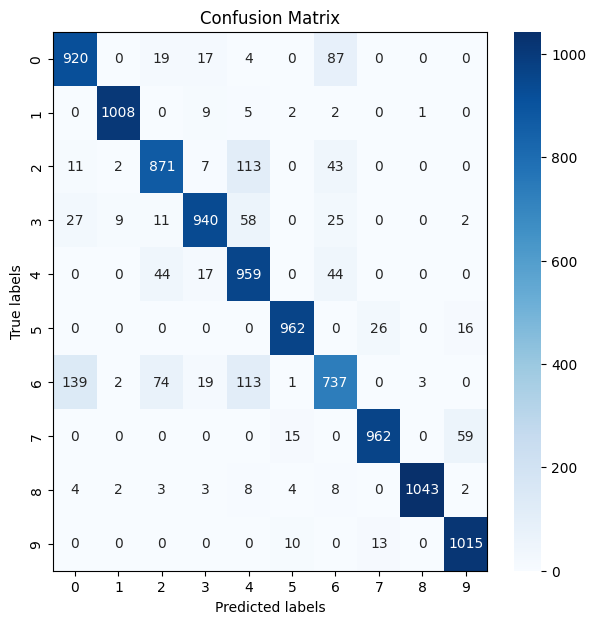

In [181]:
plt.figure(figsize=(7, 7))
sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap="Blues")

plt.gca().spines['top'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['right'].set_visible(True)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Ale všiml jsem si, že téměř všechny modely má nějaké problémy s predikcemi košil. Všechny si pletou košile s kabáty a tričky

## IV. Predikce pomocí finálního modelu

Uložím data na vyhodnocování do dataframu, aplikuju všechny manipulace pro nej, abych mohl správně použít můj finální model

In [185]:
eval_df = pd.read_csv('evaluate.csv')
display(eval_df.head())
display(eval_df.shape)

ID = eval_df['ID']
eval_df = eval_df.drop('ID', axis=1)

,ID,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix1015,pix1016,pix1017,pix1018,pix1019,pix1020,pix1021,pix1022,pix1023,pix1024
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(17500, 1025)

Nastavím finální model na evaluaci a udělám predikce

In [187]:
final_model.eval()

eval_data_tensor = torch.tensor(eval_df.values.reshape(-1, 1, 32, 32), dtype=torch.float).to(device)

with torch.no_grad():
    predictions = final_model(eval_data_tensor)

In [188]:
label = torch.argmax(predictions, dim=1).tolist()

In [189]:
results_df = pd.DataFrame({'ID': ID, 'label': label})
results_df.head(15)

,ID,label
0,0,9
1,1,4
2,2,1
3,3,7
4,4,1
5,5,9
6,6,1
7,7,6
8,8,0
9,9,0


Zobrazím několik prvních obrazků s predikovanými labely

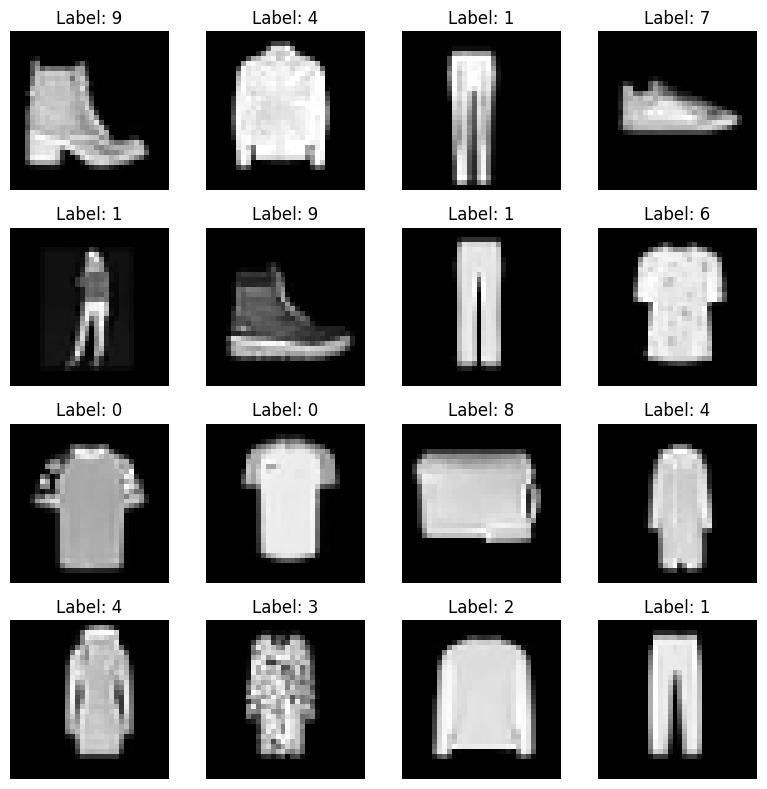

In [190]:
fig, axs = plt.subplots(4, 4, figsize=(8,8))
axs = axs.flatten()

for image_index, ax in enumerate(axs):
    image_pixels = eval_df.iloc[image_index].values
    # Reshape the pixel values into a 28x28 image
    image = image_pixels.reshape(32, 32)
    label_image = results_df['label'][image_index]
    
    ax.imshow(image, cmap='gray', extent=[0, 1, 0, 1])
    ax.set_title(f"Label: {label_image}")
    ax.axis('off')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

Uložím náš dataset to csv-souboru.

In [191]:
results_df.to_csv('results.csv', index=False)